# AI Methods for Business Final Project

**Course**: AI for Business Project



 **Program**: MSc Digital Driven Business – AUAS



 **Students**: Bustos Virginia , Roy Sreejoni, Ferrara Ariana , Reusch Benita



 **Date of submission**: 09/01/2026

## Introduction
Strategic decisions in the film industrys, such as release timing and budget allocation, are made under significant uncertainty and can strongly influence box-office performance. Recent advances in artificial intelligence enable firms to complement traditional decision-making approaches with data-driven predictive models.

This project applies machine learning techniques to forecast box-office revenue and support release-window decisions by combining structured film attributes with qualitative signals extracted from pre-release expert reviews using transformer-based embeddings. The study focuses on methodological rigor, reproducibility, and the translation of advanced AI methods into actionable business insights.


## Notebook Structure

Data Preparation and Feature Construction
- Data Sources and Scope
- Data Cleaning and Pre-processing
- Exploratory Data Analysis (EDA)
- Feature Engineering
- Text Representation Using Transformer Embeddings
- Dataset Splitting Strategy
- Handling Missing Values (Imputation)
- Feature Scaling
- Feature Selection via Matrix Decomposition (PCA)
- Data Preparation Summary

Modeling & Analysis
- Modeling Strategy Overview
- Baseline Model
- Random Forest Model
- Neural Network with Transformer-Based Features
- Model Evaluation & Comparison

Results & Business Implications
- From Business Questions to Data-Driven Insights
- Discussion 
- Limitations 
- Conclusion 
- References 
- Appendix 
- GenAI Declaration

**Data Preparation and Modeling Pipeline**

This diagram shows the end-to-end data preparation pipeline, highlighting how raw data is transformed into different feature representations used by different machine learning models. 

In [ ]:
import os
# Replace this path with the actual path to your graphviz 'bin' folder
os.environ["PATH"] += os.pathsep + 'C:/Users/arian/python/envs/AI_tutorials/Library/bin'

from graphviz import Digraph
# Your code here...

In [ ]:
# Virginia Bustos
from graphviz import Digraph

# Create diagram as SVG (best quality, no pixelation)
dot = Digraph("data_pipeline", format="svg", engine="dot")

# Global graph styling
dot.attr(
    "graph",
    rankdir="TB",          # top-to-bottom
    fontname="Arial",
    fontsize="12",
    nodesep="0.45",        # horizontal spacing between nodes
    ranksep="0.95",        # vertical spacing (prevents arrow/text overlap)
    pad="0.60",            # padding around whole diagram (prevents bottom clipping)
    margin="0.35",         # extra margin (prevents clipping)
    splines="polyline"     # cleaner than ortho for text-heavy diagrams
)

dot.attr(
    "node",
    shape="box",
    style="rounded",
    fontname="Arial",
    fontsize="12",
    margin="0.25,0.18"     #internal padding inside nodes (keeps text away from edges)
)

dot.attr(
    "edge",
    fontname="Arial",
    fontsize="10",
    arrowsize="0.75"
)

# Helper: centered HTML label
def add_node(node_id, title, subtitle=None):
    if subtitle:
        label = f"""<
        <TABLE BORDER="0" CELLBORDER="0" CELLPADDING="2">
          <TR><TD ALIGN="CENTER"><B>{title}</B></TD></TR>
          <TR><TD ALIGN="CENTER"><FONT POINT-SIZE="10">{subtitle}</FONT></TD></TR>
        </TABLE>
        >"""
    else:
        label = f"""<
        <TABLE BORDER="0" CELLBORDER="0" CELLPADDING="2">
          <TR><TD ALIGN="CENTER"><B>{title}</B></TD></TR>
        </TABLE>
        >"""
    dot.node(node_id, label=label)

# Nodes 
add_node("A", "Raw Excel files", "metaClean + sales + ExpertReviews")
add_node("B", "Cleaning + Merge", "Pre-release filter")
add_node("C", "Feature Engineering", "structured + transformer embeddings")
add_node("D", "Saved dataset", "X_features_with_embeddings.parquet + y_target.parquet")
add_node("E", "Train / Validation / Test split", "70 / 15 / 15")
add_node("F", "Split files", "X_train.parquet · X_val.parquet · X_test.parquet")

add_node("G", "Imputation", "fit on training data")

add_node("H", "Imputed output", "X_*_imputed.parquet")
add_node("RF", "Random Forest", "use imputed features")

add_node("I", "Scaling", "StandardScaler (fit on train)")
add_node("J", "Scaled output", "X_*_scaled.parquet")
add_node("K", "PCA", "fit on train · keep 95% variance")
add_node("L", "PCA output", "X_*_pca.parquet")

add_node("BL", "Baseline Model", "use PCA features")
add_node("NN", "Neural Network", "use PCA features")

# Edges

def connect(u, v, minlen="2"):
    dot.edge(u, v, tailport="s", headport="n", minlen=minlen)

connect("A", "B")
connect("B", "C")
connect("C", "D")
connect("D", "E")
connect("E", "F")
connect("F", "G", minlen="3")  # extra space before branching

# Branch 1: Imputation -> RF
connect("G", "H", minlen="3")
connect("H", "RF", minlen="3")

# Branch 2: Scaling -> PCA -> Models
connect("G", "I", minlen="3")
connect("I", "J", minlen="3")
connect("J", "K", minlen="3")
connect("K", "L", minlen="3")
connect("L", "BL", minlen="3")
connect("L", "NN", minlen="3")

#keep BL and NN on the same horizontal level for alignment
with dot.subgraph() as s:
    s.attr(rank="same")
    s.node("BL")
    s.node("NN")

# Render
dot.render("data_preparation_pipeline_academic_v3", cleanup=True)
print("Saved as data_preparation_pipeline_academic_v3.svg")

from IPython.display import SVG, display
display(SVG(filename="data_preparation_pipeline_academic_v3.svg"))


## Purpose & Objective 

The purpose of this project is to apply machine learning methods to support strategic decision-making in the film industry by forecasting box-office revenue and informing release-timing choices. The objective is to develop a rigorous and reproducible modeling pipeline that combines structured film attributes with transformer-based representations of pre-release expert reviews, and to evaluate how these integrated features contribute to predictive performance and business-relevant insights.


## Business Questions

**Main business question**: How can studios use a machine learning model that combines structured film attributes (genre and budget) with transformer-based insights from pre-release expert reviews to recommend the optimal release timing for a film and accurately forecast the box-office revenue expected for that recommended window?


- **Sub-question 1**: How do structured film attributes such as genre and budget correlate with box-office performance, and which of these factors have the strongest historical influence on revenue outcomes?

- **Sub-question 2**: To what extent do transformer-based text embeddings from pre-release expert reviews improve predictive accuracy compared to models using only structured film attributes?

- **Sub-question 3**: How does release timing affect revenue performance across different genre and budget combinations, and can machine learning identify patterns that indicate optimal release windows?

- **Sub-question 4**: 
Can the final machine learning model reliably recommend the optimal release window and forecast expected box-office revenue for that timing based on a film’s genre, budget, and pre-release expert review text?


## Data Description

The dataset integrates structured film attributes with pre-release expert review data to support predictive modeling in a business context. Structured variables capture financial, categorical, and temporal characteristics of each film, while expert review texts are transformed into numerical representations using transformer-based embeddings. All variables are restricted to information available prior to release, ensuring that the dataset reflects realistic decision, that make conditions and provides a consistent basis for exploratory analysis and model development.


## EDA based in Business Questions

In [1]:
# Code Benita
import numpy as np
import pandas as pd
from plotnine import *  # Import everything for visualization
import os
import scipy
import warnings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  # Print all outputs
from IPython.core.display import HTML  # Pretty print DataFrames
import seaborn as sns  # For correlation heatmap
import matplotlib.pyplot as plt  # For displaying heatmap
import re  # Added import for regular expressions
import pickle #for caching

In [2]:
# Get current working directory
os.getcwd()

'c:\\AI\\Assignment Material'

In [3]:
# Cache files for easy access - Code taken from Ariana's DBMS group project
CACHE_FOLDER = r"C:\Users\arian\Documents\cache_folder"
USE_CACHE = True

FILE_PATHS = {
    "sales_df": r"sales.xlsx",
    "meta_df": r"metaClean43Brightspace.xlsx",
    "expert_df": r"ExpertReviewsClean43LIWC (1).xlsx"
}

def create_cache_folder():
    """Create cache folder if it doesn't exist on the file system"""
    if not os.path.exists(CACHE_FOLDER):
        os.makedirs(CACHE_FOLDER)
        print(f"Created cache folder: {CACHE_FOLDER}")

def get_cache_path(filename):
    """Generate full file path for cached pickle file"""
    return os.path.join(CACHE_FOLDER, f"{filename}.pkl")

def save_to_cache(data, filename):
    """Save dataframe or data object to cache file using pickle serialization"""
    try:
        create_cache_folder()
        cache_path = get_cache_path(filename)
        with open(cache_path, 'wb') as f:
            pickle.dump(data, f)
        print(f"  Cached {filename}")
    except Exception as e:
        print(f"  Could not cache {filename}: {e}")

def load_from_cache(filename):
    """Load dataframe or data object from cache file if it exists"""
    try:
        cache_path = get_cache_path(filename)
        if os.path.exists(cache_path):
            with open(cache_path, 'rb') as f:
                data = pickle.load(f)
            print(f"  Loaded {filename} from cache")
            return data
        else:
            return None
    except Exception as e:
        print(f"  Could not load {filename} from cache: {e}")
        return None

In [4]:
# the functions were taken and adjusted from Ariana's DBMS group project

#function to load a singular dataset
def load_single_dataset(dataset_name, file_path):
    """Load a single dataset from cache or Excel file"""
    print(f"\nLoading {dataset_name}...")
    if USE_CACHE:
        cached_data = load_from_cache(dataset_name)
        if cached_data is not None:
            return cached_data

    try:
        print(f"  Loading from Excel: {file_path}")
        data = pd.read_excel(file_path)
        if USE_CACHE:
            save_to_cache(data, dataset_name)
        print(f"  Loaded {dataset_name} from Excel ({len(data)} rows)")
        return data
    except FileNotFoundError as e:
        print(f"  Error loading {dataset_name}: {e}")
        print("  Please check file path")
        raise


#function to load all datasets
def load_all_datasets():
    """Load sales_df , meta_df , and Expert_df datasets"""
    print("Loading datasets...")
    datasets = {}
    for dataset_name, file_path in FILE_PATHS.items():
        datasets[dataset_name] = load_single_dataset(dataset_name, file_path)

    print("\nAll files loaded successfully!")
    for name, df in datasets.items():
        print(f"\n{name} columns:")
        print(df.columns.tolist())
        print(f"Shape: {df.shape}")
    return datasets

#function to create a clean movie name
def clean_movie_name(text):
    """
    Aggressive cleaning for generating stable keys / IDs.
    - Lowercase
    - Strip URL path / punctuation
    - Remove brackets & years
    - Collapse spaces
    """
    if pd.isna(text) or text is None:
        return ""
    name = str(text).lower().strip().rstrip("/")

    # If it's a URL, just use the last segment after '/'
    name = name.rsplit("/", 1)[-1]

    # Replace dashes/underscores with spaces
    name = name.replace("-", " ").replace("_", " ")

    # Remove bracketed content () or []
    name = re.sub(r"\([^)]*\)|\[[^\]]*\]", "", name)

    # Remove non-alphanumeric (keep spaces)
    name = re.sub(r"[^a-z0-9 ]", "", name)

    # Remove trailing years like "1999" or "2016"
    name = re.sub(r"[\(\[]\s*(?:19|20)\d{2}[^)\]]*\s*[\)\]]\s*$|(?:19|20)\d{2}\s*$", "", name)

    # Collapse multiple spaces
    name = re.sub(r"\s+", " ", name).strip()

    return name

#function to pull movie title from sales dataset
def create_cleaned_title_for_sales(sales_df):
    """
    Ensure sales_df has a 'cleaned_title' column based on the best available source:
    - Prefer 'cleaned_title' if it already exists
    - Else prefer 'url'
    - Else fall back to 'Title'/'title'
    - Else mark as empty
    """
    if "cleaned_title" in sales_df.columns:
        print("sales_df: 'cleaned_title' already exists, reusing.")
        return

    if "url" in sales_df.columns:
        source_col = "url"
        print("sales_df: creating 'cleaned_title' from 'url'")
    elif "Title" in sales_df.columns:
        source_col = "Title"
        print("sales_df: creating 'cleaned_title' from 'Title'")
    elif "title" in sales_df.columns:
        source_col = "title"
        print("sales_df: creating 'cleaned_title' from 'title'")
    else:
        print("sales_df: no suitable title-like column found, setting empty cleaned_title")
        sales_df["cleaned_title"] = ""
        return

    sales_df["cleaned_title"] = sales_df[source_col].apply(clean_movie_name)

#function to pull movie title from meta dataset
def create_cleaned_title_for_meta(meta_df):
    """
    Ensure meta_file_clean has a 'cleaned_title' column based on the best available source:
    - Prefer 'cleaned_title' if it already exists
    - Else prefer 'Title'/'title'
    - Else fall back to 'url'
    - Else mark as empty
    """
    if "cleaned_title" in meta_df.columns:
        print("meta_file_clean: 'cleaned_title' already exists, reusing.")
        return

    if "Title" in meta_df.columns:
        source_col = "Title"
        print("meta_df: creating 'cleaned_title' from 'Title'")
    elif "title" in meta_df.columns:
        source_col = "title"
        print("meta_df: creating 'cleaned_title' from 'title'")
    elif "url" in meta_df.columns:
        source_col = "url"
        print("meta_df: creating 'cleaned_title' from 'url'")
    else:
        print("meta_df: no suitable title-like column found, setting empty cleaned_title")
        meta_df["cleaned_title"] = ""
        return

    meta_df["cleaned_title"] = meta_df[source_col].apply(clean_movie_name)

#function to pull movie title from expert reviews dataset
def create_cleaned_title_for_expert(expert_df):
    """
    Ensure expert_df has a 'cleaned_title' column based on the best available source:
    - Prefer 'cleaned_title' if it already exists
    - Else prefer 'Title'/'title'
    - Else fall back to 'url'
    - Else mark as empty
    """
    if "cleaned_title" in expert_df.columns:
        print("expert_df: 'cleaned_title' already exists, reusing.")
        return

    if "Title" in expert_df.columns:
        source_col = "Title"
        print("expert_df: creating 'cleaned_title' from 'Title'")
    elif "title" in expert_df.columns:
        source_col = "title"
        print("expert_df: creating 'cleaned_title' from 'title'")
    elif "url" in expert_df.columns:
        source_col = "url"
        print("expert_df: creating 'cleaned_title' from 'url'")
    else:
        print("expert_df: no suitable title-like column found, setting empty cleaned_title")
        expert_df["cleaned_title"] = ""
        return

    expert_df["cleaned_title"] = expert_df[source_col].apply(clean_movie_name)

#function to create movie ID's
def create_movie_ids(datasets_dict):
    """
    Create stable movie_id values based on a single standardized 'cleaned_title'
    shared between all dataframes.

    - cleaned_title is the canonical movie name (lowercase, stripped)
    - movie_id is generated from unique cleaned_title across all datasets
    - Any raw 'Title' / 'title' columns are left alone here but are dropped later
    """
    sales_df = datasets_dict["sales_df"]
    meta_df = datasets_dict["meta_df"]
    expert_df = datasets_dict["expert_df"]

    # Build cleaned_title in all datasets
    create_cleaned_title_for_sales(sales_df)
    create_cleaned_title_for_meta(meta_df)
    create_cleaned_title_for_expert(expert_df)

    # Collect all cleaned titles
    all_cleaned = pd.concat([
        sales_df["cleaned_title"].dropna(),
        meta_df["cleaned_title"].dropna(),
        expert_df["cleaned_title"].dropna()
    ]).unique()

    # Filter out empty strings
    all_cleaned = [t for t in all_cleaned if isinstance(t, str) and t.strip() != ""]

    # Create movie_key dimension: movie_id to cleaned_title
    movie_key = pd.DataFrame([
        {
            "movie_id": idx + 1,
            "cleaned_title": cleaned
        }
        for idx, cleaned in enumerate(sorted(all_cleaned))
    ])

    print(f"\nCreated movie_key with {len(movie_key)} unique movies")

    # Map cleaned_title to movie_id
    name_to_id = dict(zip(movie_key["cleaned_title"], movie_key["movie_id"]))

    # Attach movie_id back to dataframes
    sales_df["movie_id"] = sales_df["cleaned_title"].map(name_to_id).astype("Int64")
    meta_df["movie_id"] = meta_df["cleaned_title"].map(name_to_id).astype("Int64")
    expert_df["movie_id"] = expert_df["cleaned_title"].map(name_to_id).astype("Int64")

    # drop any raw Title columns
    for df_name, df in [("sales_df", sales_df), ("meta_file_clean", meta_df), ("expert_df", expert_df)]:
        raw_title_cols = [c for c in df.columns if c.lower() == "title"]
        if raw_title_cols:
            df.drop(columns=raw_title_cols, inplace=True)
            print(f"{df_name}: dropped raw title columns {raw_title_cols}")

    return movie_key, sales_df, meta_df, expert_df

# merge datasets on movie_id (keeping cleaned_title)
def merge_datasets(meta_df, sales_df, expert_df):
    # Merge meta and sales datasets
    meta_sales = meta_df.merge(
        sales_df,
        on="movie_id",
        how="inner",
        suffixes=("_meta", "_sales")
    )

    # Merge the above result with the expert dataset
    merged = meta_sales.merge(
        expert_df,
        on="movie_id",
        how="inner",
        # Use a suffix for the new expert columns if there are name collisions
        suffixes=("", "_expert") 
    )
    print(f"\nMerged datasets on movie_id: {merged.shape[0]} rows")

    # unify cleaned_title
    if "cleaned_title_meta" in merged.columns and "cleaned_title_sales" in merged.columns:
        merged["cleaned_title"] = merged["cleaned_title_meta"]
        merged.drop(columns=["cleaned_title_meta", "cleaned_title_sales"], inplace=True)
        print("Merged: unified 'cleaned_title' column.")

    # Drop rows where movie_id was not assigned
    before = merged.shape[0]
    merged = merged[merged["movie_id"].notna()].copy()
    after = merged.shape[0]
    print(f"Dropped {before - after} rows due to missing movie_id")

    return merged


#run the above functions
if __name__ == "__main__":
    # 1. Load datasets
    datasets = load_all_datasets()
    sales_df = datasets["sales_df"]
    meta_df = datasets["meta_df"]
    expert_df = datasets["expert_df"]

    # 2. Create standardized cleaned_title + movie_id
    movie_key, sales_df, meta_df, expert_df = create_movie_ids(datasets)

    # 3. Merge on movie_id with a single cleaned_title column
    merged_df = merge_datasets(meta_df, sales_df, expert_df)

    # 4. ensure successful outputs
    print("\n=== merged_df HEAD (movie_id, cleaned_title) ===")
    print(merged_df[["movie_id", "cleaned_title"]].head())

    print("\n=== movie_key HEAD ===")
    print(movie_key.head())


Loading datasets...

Loading sales_df...
  Loaded sales_df from cache

Loading meta_df...
  Loaded meta_df from cache

Loading expert_df...
  Loaded expert_df from cache

All files loaded successfully!

sales_df columns:
['year', 'release_date', 'title', 'genre', 'international_box_office', 'domestic_box_office', 'worldwide_box_office', 'production_budget', 'Unnamed: 8', 'opening_weekend', 'theatre_count', 'avg run per theatre', 'runtime', 'keywords', 'creative_type', 'url']
Shape: (30612, 16)

meta_df columns:
['url', 'title', 'studio', 'rating', 'runtime', 'cast', 'director', 'genre', 'summary', 'awards', 'metascore', 'userscore', 'RelDate']
Shape: (11364, 13)

expert_df columns:
['url', 'idvscore', 'reviewer', 'dateP', 'Rev', 'WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'Sixltr', 'Dic', 'function', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they', 'ipron', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'compare', 'interrog', 'number', 'quant'

In [5]:
# Benita

# Display shapes and heads to verify loading
sales_df.shape
sales_df.head()
meta_df.shape
meta_df.head()
expert_df.shape
expert_df.head()

# Data types and info
sales_df.info()
meta_df.info()
expert_df.info()

# Check for missing values
sales_missing = sales_df.isnull().sum()
sales_missing[sales_missing > 0]
meta_missing = meta_df.isnull().sum()
meta_missing[meta_missing > 0]
expert_missing = expert_df.isnull().sum()
expert_missing[expert_missing > 0]

(30612, 17)

,year,release_date,genre,international_box_office,domestic_box_office,worldwide_box_office,production_budget,Unnamed: 8,opening_weekend,theatre_count,avg run per theatre,runtime,keywords,creative_type,url,cleaned_title,movie_id
0,2000,January 1st,Drama,76576.0,NaN,76576.0,NaN,NaN,NaN,NaN,NaN,129.0,NaN,Contemporary Fiction,https://www.the-numbers.com/movie/Bakha-Satang...,bakha satang,2948
1,2001,January 12th,Thriller/Suspense,6900000.0,10965209.0,17865209.0,30000000.0,NaN,5486209.0,2433.0,3.1,NaN,NaN,Contemporary Fiction,https://www.the-numbers.com/movie/Antitrust,antitrust,2067
2,2000,January 28th,NaN,NaN,378562.0,NaN,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,https://www.the-numbers.com/movie/Santitos,santitos,25194
3,2002,2002 (Wide) by,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.the-numbers.com/movie/Frank-McKlus...,frank mcklusky c i,10464
4,2002,January 25th,Drama,4833792.0,41227069.0,46060861.0,11000000.0,NaN,12177488.0,2411.0,5.3,NaN,Coming of Age,Contemporary Fiction,https://www.the-numbers.com/movie/Walk-to-Reme...,walk to remember a,32608


(11364, 14)

,url,studio,rating,runtime,cast,director,genre,summary,awards,metascore,userscore,RelDate,cleaned_title,movie_id
0,https://www.metacritic.com/movie/!women-art-re...,Hotwire Productions,| Not Rated,83.0,NaN,Lynn Hershman-Leeson,Documentary,NaN,NaN,70,NaN,2011-06-01,women art revolution,33445
1,https://www.metacritic.com/movie/10-cloverfiel...,Paramount Pictures,| PG-13,104.0,"John Gallagher Jr.,John Goodman,Mary Elizabeth...",Dan Trachtenberg,"Action,Sci-Fi,Drama,Mystery,Thriller,Horror","Waking up from a car accident, a young woman (...","#18MostDiscussedMovieof2016 , #1MostSharedMovi...",76,7.7,2016-03-11,10 cloverfield lane,10
2,https://www.metacritic.com/movie/10-items-or-less,Click Star,| R,82.0,"Jonah Hill,Morgan Freeman,Paz Vega",Brad Silberling,"Drama,Comedy,Romance",While researching a role as a supermarket mana...,NaN,54,5.8,2006-12-01,10 items or less,16
3,https://www.metacritic.com/movie/10-years,Anchor Bay Entertainment,| R,100.0,"Channing Tatum,Chris Pratt,Jenna Dewan",Jamie Linden,"Drama,Comedy,Romance",NaN,NaN,61,6.9,2012-09-14,10 years,25
4,https://www.metacritic.com/movie/100-bloody-acres,Music Box Films,| Not Rated,91.0,NaN,Cameron Cairnes,"Horror,Comedy",Reg and Lindsay run an organic fertilizer busi...,NaN,63,7.5,2013-06-28,100 bloody acres,29


(238973, 100)

,url,idvscore,reviewer,dateP,Rev,WC,Analytic,Clout,Authentic,Tone,...,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,cleaned_title,movie_id
0,https://www.metacritic.com/movie/bronson,100.0,"""Andrew O'Hehir""",None,'Bronson owes a little or a lot to Kubrick s ...,25,73.88,11.52,6.70,25.77,...,0.0,0.0,0.0,0.00,0,8.00,0.0,0.0,bronson,4727
1,https://www.metacritic.com/movie/bronson,90.0,'A.O. Scott',None,'Bronson invites you to admire its protagonis...,30,13.07,97.69,1.00,99.00,...,0.0,0.0,0.0,0.00,0,6.67,0.0,0.0,bronson,4727
2,https://www.metacritic.com/movie/bronson,90.0,None,None,'Whether it s Peterson/Bronson s more theatri...,40,72.69,77.33,7.84,2.89,...,0.0,0.0,0.0,12.50,0,5.00,0.0,2.5,bronson,4727
3,https://www.metacritic.com/movie/bronson,83.0,'Noel Murray',None,'There are two Bronsons on display here: the ...,39,65.46,99.00,1.00,25.77,...,0.0,0.0,0.0,0.00,0,5.13,0.0,0.0,bronson,4727
4,https://www.metacritic.com/movie/bronson,80.0,'Joshua Rothkopf',None,'Refn has somehow found his way to an authent...,24,88.46,89.42,1.79,25.77,...,0.0,0.0,0.0,4.17,0,8.33,0.0,0.0,bronson,4727


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30612 entries, 0 to 30611
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      30612 non-null  int64  
 1   release_date              30612 non-null  object 
 2   genre                     28908 non-null  object 
 3   international_box_office  21575 non-null  float64
 4   domestic_box_office       11884 non-null  float64
 5   worldwide_box_office      21575 non-null  float64
 6   production_budget         4480 non-null   float64
 7   Unnamed: 8                0 non-null      float64
 8   opening_weekend           10929 non-null  float64
 9   theatre_count             10963 non-null  float64
 10  avg run per theatre       10952 non-null  float64
 11  runtime                   24559 non-null  float64
 12  keywords                  12517 non-null  object 
 13  creative_type             26667 non-null  object 
 14  url   

genre                        1704
international_box_office     9037
domestic_box_office         18728
worldwide_box_office         9037
production_budget           26132
Unnamed: 8                  30612
opening_weekend             19683
theatre_count               19649
avg run per theatre         19660
runtime                      6053
keywords                    18095
creative_type                3945
movie_id                       19
dtype: int64

studio        350
rating       1067
runtime       255
cast         3702
director       14
genre          20
summary      5897
awards       6977
userscore    2105
movie_id       11
dtype: int64

idvscore      2
reviewer      2
dateP         2
Rev           2
movie_id    187
dtype: int64

In [6]:
# Ariana

#show the number of movies listed in specific datasets only
meta_only_ids = set(meta_df['movie_id'].dropna()) - set(merged_df['movie_id'])
sales_only_ids = set(sales_df['movie_id'].dropna()) - set(merged_df['movie_id'])
expert_only_ids = set(expert_df['movie_id'].dropna()) - set(merged_df['movie_id'])

print("Meta-only movies:", len(meta_only_ids))
print("Sales-only movies:", len(sales_only_ids))
print("Expert-only movies:", len(expert_only_ids))


Meta-only movies: 4375
Sales-only movies: 23169
Expert-only movies: 4384


In [7]:
# Ariana

#show the number of rows merged
print("Merged rows:", len(merged_df))

# verify the number of Movie ID's match the number of movies
print("Unique movie_ids in merged:", merged_df['movie_id'].nunique())
print("Unique cleaned_title in merged:", merged_df['cleaned_title'].nunique())

# print complete list of column names
print(merged_df.columns.tolist())

Merged rows: 179817
Unique movie_ids in merged: 6741
Unique cleaned_title in merged: 6741
['url_meta', 'studio', 'rating', 'runtime_meta', 'cast', 'director', 'genre_meta', 'summary', 'awards', 'metascore', 'userscore', 'RelDate', 'movie_id', 'year', 'release_date', 'genre_sales', 'international_box_office', 'domestic_box_office', 'worldwide_box_office', 'production_budget', 'Unnamed: 8', 'opening_weekend', 'theatre_count', 'avg run per theatre', 'runtime_sales', 'keywords', 'creative_type', 'url_sales', 'url', 'idvscore', 'reviewer', 'dateP', 'Rev', 'WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'Sixltr', 'Dic', 'function', 'pronoun', 'ppron', 'i', 'we', 'you', 'shehe', 'they', 'ipron', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'compare', 'interrog', 'number', 'quant', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'social', 'family', 'friend', 'female', 'male', 'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'certain', 'differ', 'perce

Now that we have 1 dataframe, we will combine like columns before further analysis

1. both 'sales' and 'meta' datasets have a genre column. Merge these together, to create one unified genre column.

2. create 1 sales column: use wordwide sales if exists, else, add domestic + international sales

In [8]:
# Ariana
# 1. Combine genre columns from different datasets into one long string
raw_text = merged_df['genre_sales'].fillna('') + "," + merged_df['genre_meta'].fillna('')

# 2. Clean it up: Split by comma -> Remove Duplicates (set) -> Join back
# We also verify 'if s.strip()' to make sure we don't include empty spaces
merged_df['genre'] = raw_text.apply(lambda x: ", ".join(set(s.strip() for s in x.split(',') if s.strip())))

# 3. Drop the old columns
merged_df = merged_df.drop(columns=['genre_sales', 'genre_meta'])

In [9]:
# Ariana
# Ensure columns are numeric (converts errors to NaN) -> This prevents crashes if your data has "$" signs or commas (e.g. "$1,000")
cols_to_fix = ['worldwide_box_office', 'international_box_office', 'domestic_box_office']
for col in cols_to_fix:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# Define the logic function
def calculate_total_revenue(row):
    ww = row['worldwide_box_office']
    
    # Check if worldwide exists (not NaN) AND is not 0
    if pd.notna(ww) and ww != 0:
        return ww
    
    # if worldwide doesnt exist: Sum International + Domestic
    intl = row['international_box_office'] if pd.notna(row['international_box_office']) else 0
    dom = row['domestic_box_office'] if pd.notna(row['domestic_box_office']) else 0
    
    return intl + dom

# 3. Apply the function
merged_df['total_revenue'] = merged_df.apply(calculate_total_revenue, axis=1)


Now we will drop irrelevant columns, keeping only those necessary for future analysis

Note:
- We have yet to drop Expert reviews posted after the release date of the movie.
To achieve this, the columns 'dateP' , 'release_date', and 'Year' are needed. These columns will be dropped after filtering.

In [10]:
# Ariana
# drop all columns except those below
columns_to_keep = [
    "genre",
    "opening_weekend",
    "production_budget",
    "year",
    "release_date",
    "movie_id",
    "cleaned_title",
    "Rev",
    "total_revenue",
    "dateP"
]

merged_cleaned_df = merged_df[columns_to_keep]

# To verify the change:
print(merged_cleaned_df.head())

print("Columns after cleaning:")
print(merged_cleaned_df.columns)
print("Shape:", merged_cleaned_df.shape)

         genre  opening_weekend  production_budget  year release_date  \
0  Documentary           5791.0                NaN  2011     June 1st   
1  Documentary           5791.0                NaN  2011     June 1st   
2  Documentary           5791.0                NaN  2011     June 1st   
3  Documentary           5791.0                NaN  2011     June 1st   
4  Documentary           5791.0                NaN  2011     June 1st   

   movie_id         cleaned_title  \
0     33445  women art revolution   
1     33445  women art revolution   
2     33445  women art revolution   
3     33445  women art revolution   
4     33445  women art revolution   

                                                 Rev  total_revenue  \
0   'These interviews form the backbone of !W.A.R...        52681.0   
1   'In her vibrant !Women Art Revolution Hershma...        52681.0   
2   'It took 42 years for filmmaker Lynn Hershman...        52681.0   
3   'Anyone seeking a dialectic, of course, can l...  

In [11]:
# Ariana
# drop expert reviews posted after release date (using "year" and "release_date" vs "dateP")

# 1. Clean the 'release_date' text to remove st/nd/rd/th
merged_cleaned_df['release_date_clean'] = merged_cleaned_df['release_date'].astype(str).str.replace(r'(?<=\d)(st|nd|rd|th)', '', regex=True)

# 2. Create a combined string column (Year + Month + Day)
# Example: "2011" + " " + "June 1" = "2011 June 1"
merged_cleaned_df['full_date_str'] = merged_cleaned_df['year'].astype(str) + ' ' + merged_cleaned_df['release_date_clean']

# 3. Convert that string into a real Datetime object
merged_cleaned_df['full_release_date'] = pd.to_datetime(merged_cleaned_df['full_date_str'], errors='coerce')

# 4. Convert expert Review Date (dateP) to datetime as well
merged_cleaned_df['dateP'] = pd.to_datetime(merged_cleaned_df['dateP'], errors='coerce')

# now perform filtering

# Keep rows where the Review Date is BEFORE or ON the specific Release Date
mask = (merged_cleaned_df['dateP'] <= merged_cleaned_df['full_release_date']) & \
       (merged_cleaned_df['dateP'].notna()) & \
       (merged_cleaned_df['full_release_date'].notna())

merged_cleaned_df = merged_cleaned_df[mask]

# Rename and clean up
merged_cleaned_df = merged_cleaned_df.rename(columns={'Rev': 'prerelease_reviews'})

# Check the results
print(f"Remaining rows: {len(merged_cleaned_df)}")
print(merged_cleaned_df[['dateP', 'full_release_date', 'prerelease_reviews']].head())

Remaining rows: 65115
        dateP full_release_date  \
8  2011-05-31        2011-06-01   
11 2016-03-11        2016-03-11   
12 2016-03-10        2016-03-11   
13 2016-03-10        2016-03-11   
14 2016-03-10        2016-03-11   

                                   prerelease_reviews  
8    'Thankfully, Lynn Hershman-Leeson s loosely o...  
11   'Economically told from the start, the film m...  
12   'This is a terrific movie that will keep audi...  
13   'Sneakily tweaking our fears of terrorism, 10...  
14   'Approach 10 Cloverfield Lane on its own term...  


C:\Users\arian\AppData\Local\Temp\ipykernel_15440\3852565773.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\arian\AppData\Local\Temp\ipykernel_15440\3852565773.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\arian\AppData\Local\Temp\ipykernel_15440\3852565773.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [12]:
# Ariana
# List of all columns to remove (these columns were used in the cell above. they are not needed for further analysis).
cols_to_remove = [
    'dateP', 
    'full_release_date', 
    'year', 
    'release_date_clean',  
    'full_date_str'       
]

# Drop them with errors='ignore' so it won't crash if one of these is already gone
merged_cleaned_df = merged_cleaned_df.drop(columns=cols_to_remove, errors='ignore')

# Verify they are gone
print("Remaining columns:")
print(merged_cleaned_df.columns.tolist())

Remaining columns:
['genre', 'opening_weekend', 'production_budget', 'release_date', 'movie_id', 'cleaned_title', 'prerelease_reviews', 'total_revenue']


There are currently 2 dataframes being used for different purposes.

- merged_cleaned_df has the columns we will analyze - no one-hot encoding performed on genre.
- below, df_genre_encoded is created to perform EDA on genre-specific movies.

In [13]:
# Benita and Ariana
from sklearn.preprocessing import MultiLabelBinarizer

# 1. Clean and split the genre column into a list
df_genre_encoded = merged_cleaned_df.copy()

df_genre_encoded['genre_list'] = (
    df_genre_encoded['genre']
    .fillna('')                                # handle NaN
    .str.split(',')                            # split on comma
    .apply(lambda lst: 
           [g.strip().lower() for g in lst     # strip spaces + lowercase
            if g.strip() != ''])               # drop empty strings
)

# 2. Apply MultiLabelBinarizer to get one-hot columns
mlb = MultiLabelBinarizer()

genre_dummies = pd.DataFrame(
    mlb.fit_transform(df_genre_encoded['genre_list']),
    columns=[f"genre_{g}" for g in mlb.classes_],
    index=df_genre_encoded.index
)

# 3. Combine back into your dataframe
df_genre_encoded = pd.concat(
    [df_genre_encoded.drop(columns=['genre', 'genre_list']),
     genre_dummies],
    axis=1
)

# 4. Show new shape + columns
print("New shape:", df_genre_encoded.shape)
print("Genre columns:", genre_dummies.columns.tolist())

print("---------------------------------------")
print (df_genre_encoded.columns)
print("---------------------------------------")
print (df_genre_encoded.head)

New shape: (65115, 36)
Genre columns: ['genre_action', 'genre_adult', 'genre_adventure', 'genre_animation', 'genre_biography', 'genre_black comedy', 'genre_comedy', 'genre_concert/performance', 'genre_crime', 'genre_documentary', 'genre_drama', 'genre_family', 'genre_fantasy', 'genre_history', 'genre_horror', 'genre_multiple genres', 'genre_music', 'genre_musical', 'genre_mystery', 'genre_news', 'genre_romance', 'genre_romantic comedy', 'genre_sci-fi', 'genre_short', 'genre_sport', 'genre_thriller', 'genre_thriller/suspense', 'genre_war', 'genre_western']
---------------------------------------
Index(['opening_weekend', 'production_budget', 'release_date', 'movie_id',
       'cleaned_title', 'prerelease_reviews', 'total_revenue', 'genre_action',
       'genre_adult', 'genre_adventure', 'genre_animation', 'genre_biography',
       'genre_black comedy', 'genre_comedy', 'genre_concert/performance',
       'genre_crime', 'genre_documentary', 'genre_drama', 'genre_family',
       'genre_fan

In [14]:
# Benita
# Descriptive statistics for numerical columns
numerical_cols = ['total_revenue', 'production_budget', 'opening_weekend']
merged_cleaned_df[numerical_cols].describe()

,total_revenue,production_budget,opening_weekend
count,6.511500e+04,3.547300e+04,5.260100e+04
mean,1.160901e+08,6.148203e+07,1.742844e+07
std,2.517252e+08,6.562209e+07,3.345464e+07
min,0.000000e+00,2.000000e+04,8.600000e+01
25%,1.903200e+05,1.500000e+07,5.735300e+04
50%,1.072754e+07,3.500000e+07,4.174915e+06
75%,1.030393e+08,9.000000e+07,1.954225e+07
max,2.797801e+09,4.000000e+08,3.571150e+08


In [15]:
# Ariana
# Identify the new columns in df_genre_encoded dataframe
genre_cols = [col for col in df_genre_encoded.columns if col.startswith('genre_')]

#Sum them up
genre_counts = df_genre_encoded[genre_cols].sum().sort_values(ascending=False)

#Print result
print(genre_counts)

genre_drama                  37304
genre_comedy                 20499
genre_thriller               18082
genre_action                 15099
genre_adventure              12125
genre_sci-fi                  8480
genre_crime                   8472
genre_thriller/suspense       8074
genre_romance                 7767
genre_documentary             7612
genre_fantasy                 7195
genre_horror                  7056
genre_biography               6688
genre_mystery                 5826
genre_family                  4607
genre_history                 3459
genre_animation               3088
genre_music                   2988
genre_romantic comedy         2217
genre_war                     2151
genre_musical                 1860
genre_sport                   1517
genre_black comedy            1412
genre_western                  601
genre_news                     322
genre_concert/performance      138
genre_multiple genres           67
genre_adult                     41
genre_short         

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation: Budget vs. Opening vs. Revenue')

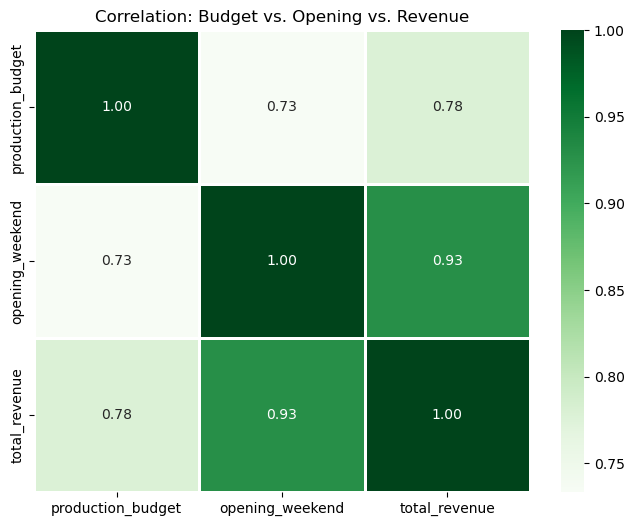

In [16]:
# Benita
# Select only the numerical columns we have right now
# We use .drop_duplicates('movie_id') to ensure we don't count the same movie 50 times
df_unique = merged_cleaned_df.drop_duplicates(subset=['movie_id'])

cols_to_check = ['production_budget', 'opening_weekend', 'total_revenue']

# Create the Correlation Matrix
corr_matrix = df_unique[cols_to_check].corr()

#Plot the Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Greens', fmt='.2f', linewidths=1)
plt.title('Correlation: Budget vs. Opening vs. Revenue')
plt.show()

<Figure size 1200x500 with 0 Axes>

<Axes: >

<Axes: xlabel='production_budget', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Production Budget')

Text(0.5, 0, 'Budget ($)')

<Axes: >

<Axes: xlabel='total_revenue', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Total Revenue')

Text(0.5, 0, 'Revenue ($)')

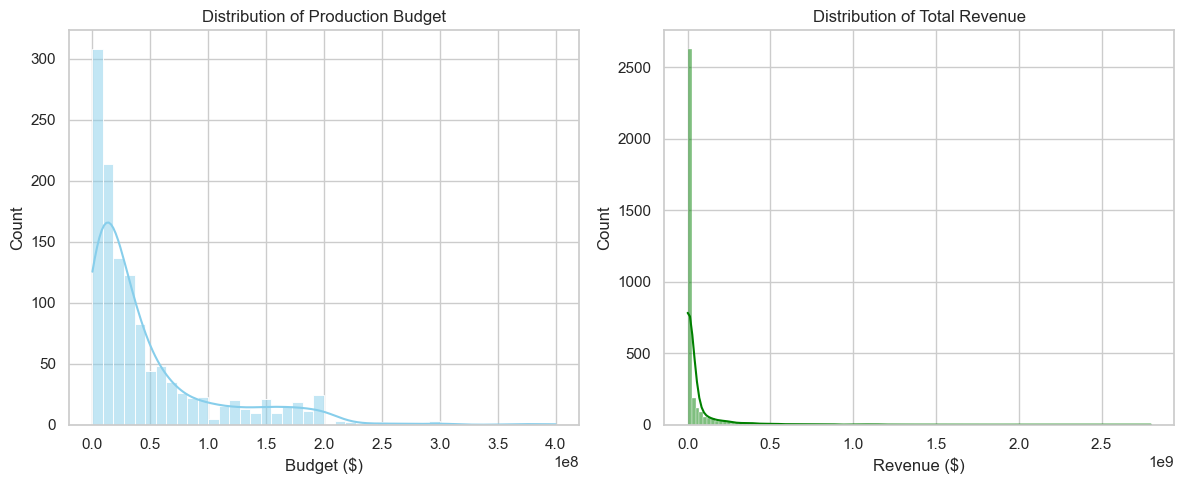

In [17]:
# Ariana
# Set the visual style
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 5))

# Plot 1: Production Budget Distribution
plt.subplot(1, 2, 1)
sns.histplot(df_unique['production_budget'], kde=True, color='skyblue')
plt.title('Distribution of Production Budget')
plt.xlabel('Budget ($)')

# Plot 2: Total Revenue Distribution
plt.subplot(1, 2, 2)
sns.histplot(df_unique['total_revenue'], kde=True, color='green')
plt.title('Distribution of Total Revenue')
plt.xlabel('Revenue ($)')

plt.tight_layout()
plt.show()

Review Stats:
count       3475.0
mean     18.738129
std      17.257421
min            1.0
25%            8.0
50%           13.0
75%           25.0
max          308.0
Name: count, dtype: Float64


<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='count', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Review Counts per Movie')

Text(0.5, 0, 'Number of Reviews')

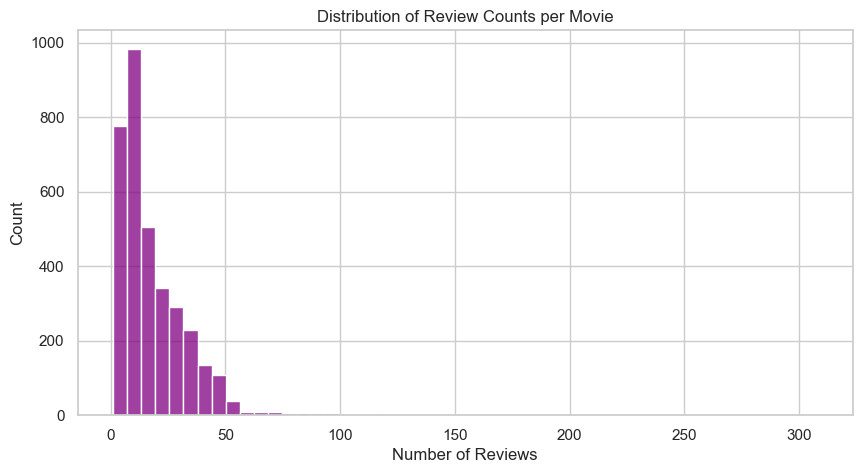

In [18]:
# Ariana
# Count how many reviews exist per movie_id
reviews_per_movie = df_genre_encoded['movie_id'].value_counts()

print("Review Stats:")
print(reviews_per_movie.describe())

plt.figure(figsize=(10, 5))
sns.histplot(reviews_per_movie, bins=50, color='purple')
plt.title('Distribution of Review Counts per Movie')
plt.xlabel('Number of Reviews')
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='production_budget', ylabel='total_revenue'>

Text(0.5, 1.0, 'Production Budget vs. Total Revenue (Log Scale)')

Text(0.5, 0, 'Production Budget ($)')

Text(0, 0.5, 'Total Revenue ($)')

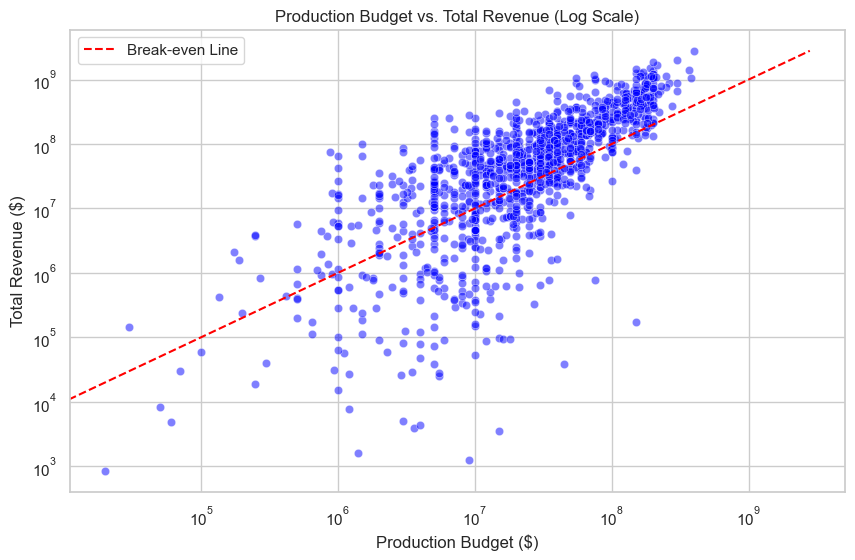

In [19]:
# Ariana
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_unique, x='production_budget', y='total_revenue', alpha=0.5, color='blue')

# Add a diagonal line (Break-even line)
# Movies below this line lost money. Movies above it made a profit.
max_val = max(df_unique['production_budget'].max(), df_unique['total_revenue'].max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Break-even Line')

plt.xscale('log')
plt.yscale('log')
plt.title('Production Budget vs. Total Revenue (Log Scale)')
plt.xlabel('Production Budget ($)')
plt.ylabel('Total Revenue ($)')
plt.legend()
plt.show()

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='word_count', ylabel='Count'>

Text(0.5, 1.0, 'Distribution of Review Lengths (Word Count)')

Text(0.5, 0, 'Number of Words in Review')

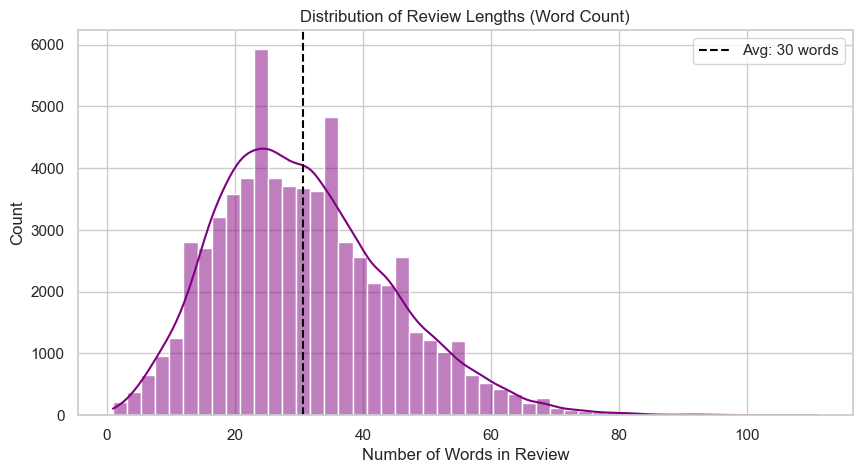

Number of reviews with less than 5 words: 388


In [20]:
# Ariana
#Calculate word count for every review

# use the original dataframe 'df_genre_encoded' because we want to check ALL reviews
df_genre_encoded['word_count'] = df_genre_encoded['prerelease_reviews'].astype(str).apply(lambda x: len(x.split()))

# Plot the Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df_genre_encoded['word_count'], bins=50, color='purple', kde=True)
plt.title('Distribution of Review Lengths (Word Count)')
plt.xlabel('Number of Words in Review')
plt.axvline(df_genre_encoded['word_count'].mean(), color='black', linestyle='--', label=f"Avg: {int(df_genre_encoded['word_count'].mean())} words")
plt.legend()
plt.show()

# check for short reviews
short_reviews = df_genre_encoded[df_genre_encoded['word_count'] < 5]
print(f"Number of reviews with less than 5 words: {len(short_reviews)}")


In [21]:
# Benita
# ROI = (revenue - budget) / budget
merged_cleaned_df['roi'] = (merged_cleaned_df['total_revenue'] - merged_cleaned_df['production_budget']) / merged_cleaned_df['production_budget']
df_genre_encoded['roi'] = (merged_cleaned_df['total_revenue'] - merged_cleaned_df['production_budget']) / merged_cleaned_df['production_budget']

# Create a new dataframe with only valid budgets
roi_df = merged_cleaned_df.dropna(subset=['production_budget'])

# Drop duplicates based on the movie title to ensure each movie is only represented once
roi_df_unique = roi_df.drop_duplicates(subset=['cleaned_title'])

# Verify it worked
print(f"Original rows: {len(merged_cleaned_df)}")
print(f"Rows with budget: {len(roi_df_unique)}")
print('\n')
print(roi_df_unique[['cleaned_title', 'production_budget', 'roi']].head())

# Keep rows where budget exists AND is greater than 0
roi_df = merged_cleaned_df[merged_cleaned_df['production_budget'] > 0]

# check top performers
print('\n-----------TOP PERFORMERS (Unique Movies)-----------')
print(roi_df_unique[['cleaned_title', 'roi']].sort_values(by='roi', ascending=False).head())

Original rows: 65115
Rows with budget: 1251


                                cleaned_title  production_budget       roi
11                        10 cloverfield lane         15000000.0  6.219095
203                                 12 strong         35000000.0  1.031954
262                          12 years a slave         20000000.0  8.038253
306                                 127 hours         18000000.0  2.345398
385  13 hours the secret soldiers of benghazi         50000000.0  0.388227

-----------TOP PERFORMERS (Unique Movies)-----------
       cleaned_title        roi
174855     searching  84.950053
112433     insidious  65.580591
201243    unfriended  63.364198
93626        get out  49.459481
140695     moonlight  42.438093


In [22]:
# Benita
# Derive budget_level
def categorize_budget(budget):
    if budget < 10000000:
        return 'Low'
    elif budget <= 50000000:
        return 'Medium'
    else:
        return 'High'

df_genre_encoded['budget_level'] = merged_cleaned_df['production_budget'].apply(categorize_budget)

In [23]:
# Benita
# Identify all your genre columns
genre_cols = [col for col in df_genre_encoded.columns if col.startswith('genre_')]

# Create a list to store the results
results = []

for genre in genre_cols:
    # Filter rows where this specific genre is 1 (True)
    genre_data = df_genre_encoded[df_genre_encoded[genre] == 1]
    
    # Calculate stats for this genre
    # Use 'total_revenue' if you created it in the previous step, otherwise use 'total_revenue'
    stats = genre_data['total_revenue'].agg(['mean', 'median', 'count'])
    
    # Add the genre name (stripping 'genre_' for cleanliness)
    stats['genre'] = genre.replace('genre_', '')
    results.append(stats)

# Convert list of series to a DataFrame
genre_stats = pd.DataFrame(results).set_index('genre')

# Sort and print
genre_stats = genre_stats.sort_values('mean', ascending=False)

print("\nSub-question 1: Genre Influence on Revenue")
print(genre_stats)


Sub-question 1: Genre Influence on Revenue
                             mean       median    count
genre                                                  
adult                5.707950e+08  570794950.0     41.0
adventure            4.042509e+08  273477501.0  12125.0
fantasy              3.832421e+08  214949716.0   7195.0
sci-fi               3.736059e+08  242981799.0   8480.0
animation            3.650182e+08  249517956.0   3088.0
family               3.404421e+08  212550576.0   4607.0
action               3.081876e+08  166360232.0  15099.0
musical              2.792877e+08   74146087.0   1860.0
thriller             1.440525e+08   33943049.0  18082.0
war                  1.298995e+08   23237252.0   2151.0
comedy               1.230052e+08   26887177.0  20499.0
crime                1.203718e+08   37566117.0   8472.0
mystery              1.095566e+08   35950421.0   5826.0
romance              9.547660e+07   15342913.0   7767.0
horror               9.251123e+07   18976477.0   7056.0
musi

In [24]:
# Benita
# Identify genre columns
genre_cols = [col for col in df_genre_encoded.columns if col.startswith('genre_')]

# Lists to store the results
roi_results = []
revenue_results = []

for genre_col in genre_cols:
    # Get the simple name (e.g., "Action" instead of "genre_Action")
    genre_name = genre_col.replace('genre_', '')
    
    # Filter for movies that belong to this genre
    genre_data = df_genre_encoded[df_genre_encoded[genre_col] == 1]
    
    # --- ROI Analysis ---
    # Group by budget_level for this specific genre
    roi_stats = df_genre_encoded.groupby('budget_level')['roi'].agg(['mean', 'count'])
    roi_stats['genre'] = genre_name  # Add genre name to keep track
    roi_results.append(roi_stats)
    
    # --- Revenue Analysis ---
    rev_stats = genre_data.groupby('budget_level')['total_revenue'].agg(['mean', 'count'])
    rev_stats['genre'] = genre_name
    revenue_results.append(rev_stats)

# Combine all results into single DataFrames
budget_genre_roi = pd.concat(roi_results).reset_index().set_index(['genre', 'budget_level']).sort_values('mean', ascending=False)
budget_genre_revenue = pd.concat(revenue_results).reset_index().set_index(['genre', 'budget_level']).sort_values('mean', ascending=False)

# Print results
print("\nSub-question 2: Budget Level and ROI by Genre")
print("ROI Stats (Top 10):")
print(budget_genre_roi.head(10))

print("\nRevenue Stats (Top 10):")
print(budget_genre_revenue.head(10))


Sub-question 2: Budget Level and ROI by Genre
ROI Stats (Top 10):
                                      mean  count
genre               budget_level                 
horror              Low           5.749399   5729
fantasy             Low           5.749399   5729
news                Low           5.749399   5729
documentary         Low           5.749399   5729
family              Low           5.749399   5729
romance             Low           5.749399   5729
crime               Low           5.749399   5729
musical             Low           5.749399   5729
romantic comedy     Low           5.749399   5729
concert/performance Low           5.749399   5729

Revenue Stats (Top 10):
                                mean  count
genre     budget_level                     
adult     Medium        5.707950e+08     41
adventure High          4.703834e+08  10076
sci-fi    High          4.490548e+08   6770
fantasy   High          4.454999e+08   5987
animation High          4.181276e+08   2600


## Feature Engineering and Text Representation

The purpose of this part of notebook is to transform the cleaned Metacritic dataset into a machine-learning-ready feature set that supports revenue prediction and release-timing recommendation. This step bridges the gap between exploratory analysis and model development by converting both structured and unstructured data into numerical representations suitable for supervised learning.

First, structured film attributes such as genre, budget, and release timing are engineered and transformed into informative features that capture business-relevant patterns, including budget scale and seasonal release effects. Categorical variables are encoded, and numerical variables are prepared for downstream modelling to ensure compatibility with baseline, tree-based, and neural network models.

Second, unstructured pre-release expert review text is incorporated using a transformer-based language model from the Hugging Face ecosystem. By extracting dense semantic embeddings from expert reviews, qualitative assessments are translated into quantitative features that capture sentiment, tone, and contextual meaning beyond traditional numerical variables.

The resulting feature set combines structured film metadata with transformer-based textual insights, forming the foundation for subsequent train/validation/test splitting, feature selection, model training, evaluation, and explainability analyses.


In [25]:
#Sreejoni Roy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!conda install openpyxl -y



3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.11.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [26]:
#Roy
from datetime import datetime

In [27]:
#Roy
pd.set_option("display.max_columns", 200) #showing the columns when print is coded.

In [28]:
#Roy
# Loading the cleaned metacritic file as it has genre, metascore/userscore, etc.
meta = pd.read_excel("metaClean43Brightspace.xlsx")

# Loading the sales/box office file as it has budget and worldwide_box_office etc.
sales = pd.read_excel("sales.xlsx")

# Load the expert reviews which has the text needed for the transformers
expert = pd.read_excel("ExpertReviews.xlsx")


In [29]:
#roy
#printing to see the file content/shape
print("meta:", meta.shape)
print("sales:", sales.shape)
print("expert:", expert.shape)

meta: (11364, 13)
sales: (30612, 16)
expert: (238973, 5)


In [30]:
#roy
print("meta columns:\n", meta.columns.tolist(), "\n")
print("sales columns:\n", sales.columns.tolist(), "\n")
print("expert columns:\n", expert.columns.tolist(), "\n")
#printing to see all the columns for the three datafiles

meta columns:
 ['url', 'title', 'studio', 'rating', 'runtime', 'cast', 'director', 'genre', 'summary', 'awards', 'metascore', 'userscore', 'RelDate'] 

sales columns:
 ['year', 'release_date', 'title', 'genre', 'international_box_office', 'domestic_box_office', 'worldwide_box_office', 'production_budget', 'Unnamed: 8', 'opening_weekend', 'theatre_count', 'avg run per theatre', 'runtime', 'keywords', 'creative_type', 'url'] 

expert columns:
 ['url', 'idvscore', 'reviewer', 'dateP', 'Rev'] 



In [31]:
#roy
#displaying 2 rows for each of the datafiles to see the content
display(meta.head(2))
display(sales.head(2))
display(expert.head(2))

,url,title,studio,rating,runtime,cast,director,genre,summary,awards,metascore,userscore,RelDate
0,https://www.metacritic.com/movie/!women-art-re...,!Women Art Revolution,Hotwire Productions,| Not Rated,83.0,NaN,Lynn Hershman-Leeson,Documentary,NaN,NaN,70,NaN,2011-06-01
1,https://www.metacritic.com/movie/10-cloverfiel...,10 Cloverfield Lane,Paramount Pictures,| PG-13,104.0,"John Gallagher Jr.,John Goodman,Mary Elizabeth...",Dan Trachtenberg,"Action,Sci-Fi,Drama,Mystery,Thriller,Horror","Waking up from a car accident, a young woman (...","#18MostDiscussedMovieof2016 , #1MostSharedMovi...",76,7.7,2016-03-11


,year,release_date,title,genre,international_box_office,domestic_box_office,worldwide_box_office,production_budget,Unnamed: 8,opening_weekend,theatre_count,avg run per theatre,runtime,keywords,creative_type,url
0,2000,January 1st,Bakha Satang,Drama,76576.0,NaN,76576.0,NaN,NaN,NaN,NaN,NaN,129.0,NaN,Contemporary Fiction,https://www.the-numbers.com/movie/Bakha-Satang...
1,2001,January 12th,Antitrust,Thriller/Suspense,6900000.0,10965209.0,17865209.0,30000000.0,NaN,5486209.0,2433.0,3.1,NaN,NaN,Contemporary Fiction,https://www.the-numbers.com/movie/Antitrust


,url,idvscore,reviewer,dateP,Rev
0,https://www.metacritic.com/movie/bronson,100.0,"""Andrew O'Hehir""",None,'Bronson owes a little or a lot to Kubrick s ...
1,https://www.metacritic.com/movie/bronson,90.0,'A.O. Scott',None,'Bronson invites you to admire its protagonis...


In [32]:
#roy
# Merging the url because it is the cleanest unique ID across the files
df = meta.merge(
    sales,
    on="url",
    how="left",     #it is left because all the cleaned Metacritic rows are kept, and sales numbers will attach when available.
    suffixes=("_meta", "_sales")
)


In [33]:
#roy
print("After merge:", df.shape) #to see the effect of the code above

# Quick check to see how many rows have information on sales?
print("Missing production_budget:", df["production_budget"].isna().mean())
print("Missing worldwide_box_office:", df["worldwide_box_office"].isna().mean())

After merge: (11364, 28)
Missing production_budget: 1.0
Missing worldwide_box_office: 1.0


In [34]:
#roy
# Resolving release date (sales file has 'release_date', meta has 'RelDate')
# sales.release_date because it is cleaner for timing.

df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")

# backup plan if release_date is missing. using RelDate from meta
df["RelDate"] = pd.to_datetime(df["RelDate"], errors="coerce")
df["release_date"] = df["release_date"].fillna(df["RelDate"])

In [35]:
df["release_date"] = pd.to_datetime(df["RelDate"], errors="coerce") #code fixer for month to season error
#roy

In [36]:
#roy
# Creating the timing features
df["release_year"] = df["release_date"].dt.year
df["release_month"] = df["release_date"].dt.month
df["release_quarter"] = df["release_date"].dt.quarter

In [37]:
#roy
# a season mapping in order to categorize months into season
#this is needed so that the end product/model can tell the user/studio which season is the best realease window for their movie.
def month_to_season(m):
    if pd.isna(m):
        return np.nan
    if m in [12, 1, 2]:
        return "Winter"
    if m in [3, 4, 5]:
        return "Spring"
    if m in [6, 7, 8]:
        return "Summer"
    return "Fall"


df["release_month"] = df["release_date"].dt.month
df["release_season"] = df["release_month"].apply(month_to_season)


In [38]:
#roy
# features for budget 
df["production_budget"] = pd.to_numeric(df["production_budget"], errors="coerce")
df["budget_log"] = np.log1p(df["production_budget"])

In [39]:
#roy
#this step of the code is run to avoid errors in the codes below.
# creating a clean merge key in BOTH dataframes/files
meta["title_key"]  = meta["title"].astype(str).str.lower().str.strip()
sales["title_key"] = sales["title"].astype(str).str.lower().str.strip()

#  removing the year in brackets, extra spaces, punctuation 
meta["title_key"]  = meta["title_key"].str.replace(r"\(\d{4}\)", "", regex=True).str.replace(r"[^a-z0-9 ]", "", regex=True).str.strip()
sales["title_key"] = sales["title_key"].str.replace(r"\(\d{4}\)", "", regex=True).str.replace(r"[^a-z0-9 ]", "", regex=True).str.strip()

#  merging again (bringing budget in from sales)
df = meta.merge(sales[["title_key", "production_budget"]], on="title_key", how="left")

# little sanity check
print("Budget missing rate:", df["production_budget"].isna().mean())
df[["title", "production_budget"]].head(10)

Budget missing rate: 0.675531914893617


,title,production_budget
0,!Women Art Revolution,NaN
1,10 Cloverfield Lane,15000000.0
2,10 Items or Less,NaN
3,10 Years,NaN
4,100 Bloody Acres,NaN
5,100 Streets,NaN
6,"1,000 Times Good Night",NaN
7,"10,000 BC",105000000.0
8,"10,000 km",NaN
9,1001 Grams,NaN


In [40]:
#roy
# labeling bugdet levels into low, mid and high.
#this is needed as the user/studio needs to input whether their movie's budget is low, mid or high.
b = df["production_budget"]
k = min(3, b.nunique(dropna=True))

if k < 2:
    df["budget_level"] = "Unknown"
else:
    label_map = {2: ["Low", "High"], 3: ["Low", "Mid", "High"]}
    df["budget_level"] = pd.qcut(b, q=k, labels=label_map[k], duplicates="drop").astype(str)
    df["budget_level"] = df["budget_level"].fillna("Unknown")

In [41]:
#roy 
df = meta.merge(   #Merging budget and worldwide revenue from sales into meta 
    sales[
        [
            "title_key",
            "production_budget",
            "worldwide_box_office",
            "domestic_box_office",
            "international_box_office",
        ]
    ],
    on="title_key",
    how="left"
)

In [42]:
#roy
df["worldwide_box_office"] = pd.to_numeric(
    df["worldwide_box_office"], errors="coerce"
)

df["revenue_log"] = np.log1p(df["worldwide_box_office"])
#Converting revenue to numeric and doing log-transform

Financial variables such as production budget and worldwide box office revenue were integrated from an external sales dataset using normalized title keys. Due to skewness in revenue data, a log transformation was applied.

In [43]:
#roy
df[["title", "production_budget", "worldwide_box_office"]].head(10)
df["worldwide_box_office"].isna().mean()
#simple check to see if the code above worked

,title,production_budget,worldwide_box_office
0,!Women Art Revolution,NaN,NaN
1,10 Cloverfield Lane,15000000.0,108286422.0
2,10 Items or Less,NaN,NaN
3,10 Years,NaN,987640.0
4,100 Bloody Acres,NaN,NaN
5,100 Streets,NaN,307.0
6,"1,000 Times Good Night",NaN,NaN
7,"10,000 BC",105000000.0,269065678.0
8,"10,000 km",NaN,20452.0
9,1001 Grams,NaN,47019.0


np.float64(0.4831283244680851)

In [44]:
#roy
#target variable for understanding/measuring the level of success for the movie- worldwide box office
df["worldwide_box_office"] = pd.to_numeric(df["worldwide_box_office"], errors="coerce")
df["revenue_log"] = np.log1p(df["worldwide_box_office"])



In [45]:
#Virginia Bustos
#Ensures required temporal features exist for downstream analysis without altering original code
# ============================================================
# PREP STEP – ensure release_month & release_season exist
# (no release date available in df)

# If release_month already exists somewhere under another name, reuse it
month_candidates = ["release_month", "month", "releaseMonth"]

month_col = next((c for c in month_candidates if c in df.columns), None)

if month_col is None:
    # Fallback: assign NA instead of failing (prevents downstream errors)
    df["release_month"] = pd.NA
else:
    df["release_month"] = df[month_col]

# Create release_season only if missing
if "release_season" not in df.columns:
    def month_to_season(month):
        if pd.isna(month):
            return pd.NA
        month = int(month)
        if month in [12, 1, 2]:
            return "Winter"
        elif month in [3, 4, 5]:
            return "Spring"
        elif month in [6, 7, 8]:
            return "Summer"
        else:
            return "Autumn"

    df["release_season"] = df["release_month"].apply(month_to_season)

print("✔ release_month & release_season prepared (no release date column available)")


✔ release_month & release_season prepared (no release date column available)


In [46]:
#roy
#ROI feature 
df["roi"] = df["worldwide_box_office"] / df["production_budget"]
#seeing the display - content check
display(df[["title", "genre", "production_budget", "worldwide_box_office", "roi", "release_month", "release_season"]].head())

,title,genre,production_budget,worldwide_box_office,roi,release_month,release_season
0,!Women Art Revolution,Documentary,NaN,NaN,NaN,<NA>,<NA>
1,10 Cloverfield Lane,"Action,Sci-Fi,Drama,Mystery,Thriller,Horror",15000000.0,108286422.0,7.219095,<NA>,<NA>
2,10 Items or Less,"Drama,Comedy,Romance",NaN,NaN,NaN,<NA>,<NA>
3,10 Years,"Drama,Comedy,Romance",NaN,987640.0,NaN,<NA>,<NA>
4,100 Bloody Acres,"Horror,Comedy",NaN,NaN,NaN,<NA>,<NA>


Until now 
1) dates were converted,
2) Season features were created for optimal release window,
3) buget features (log and categories) and 
4) revenue target (along with a log version) was created



In [47]:
#roy
# resolving the expert review dates
expert["dateP"] = pd.to_datetime(expert["dateP"], errors="coerce")

C:\Users\arian\AppData\Local\Temp\ipykernel_15440\4088013954.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


In [48]:
#Virginia Bustos
# ensure df has 'release_date' for review merge cell
# Reason: df gets overwritten by later merges (title_key), dropping release_date.

#If release_date is missing, create it from the best available source
if "release_date" not in df.columns:
    # Prefer RelDate (meta), fallback to other possible columns if present
    date_candidates = ["RelDate", "reldate", "releaseDate", "release_date_meta"]
    src = next((c for c in date_candidates if c in df.columns), None)

    if src is None:
        # Create the column anyway so the downstream cell doesn't crash
        df["release_date"] = pd.NaT
    else:
        df["release_date"] = pd.to_datetime(df[src], errors="coerce")
else:
    # Make sure it's datetime (so date comparisons work later)
    df["release_date"] = pd.to_datetime(df["release_date"], errors="coerce")

print("release_date ensured. Null rate:", df["release_date"].isna().mean())


release_date ensured. Null rate: 0.0


In [49]:
#roy
# merging the  reviews into the main df (by using url)
# This will create a long table with one row per (movie x review)
df_reviews = df[["url", "title", "release_date"]].merge(
    expert[["url", "dateP", "Rev", "idvscore"]],
    on="url",
    how="left"
)

print("df_reviews:", df_reviews.shape) #content check

df_reviews: (253921, 6)


In [50]:
#roy
# only kepping reviews that happened BEFORE release_date (pre-release)
#this is needed as model/product needs the pre-release expert reviews inputted by the studios/user.
#transformers will be used on the expert reviews.
df_reviews_pre = df_reviews[
    (df_reviews["dateP"].notna()) &
    (df_reviews["release_date"].notna()) &
    (df_reviews["dateP"] <= df_reviews["release_date"])
].copy()

print("pre-release review rows:", df_reviews_pre.shape)
#content check

pre-release review rows: (107111, 6)


In [51]:
#roy
# Combining all pre-release reviews into one text blob per movie
# This makes it easier for embeddings rather than doing many reviews separately
review_text_per_movie = (
    df_reviews_pre.groupby("url")["Rev"]
    .apply(lambda x: " ".join(x.dropna().astype(str)))
    .reset_index()
    .rename(columns={"Rev": "pre_release_expert_text"})
)

display(review_text_per_movie.head(3)) #content check 

,url,pre_release_expert_text
0,https://www.metacritic.com/movie/!women-art-re...,"'Thankfully, Lynn Hershman-Leeson s loosely o..."
1,https://www.metacritic.com/movie/10-cloverfiel...,"'Economically told from the start, the film m..."
2,https://www.metacritic.com/movie/10-years,"'There s a relaxed, unforced, melancholy swee..."


In [52]:
#roy
#adding the combined texts back into the main dataframe

df = df.merge(review_text_per_movie, on="url", how="left")

# Filling in the missing text with empty string so the transformer codes do not give errors or crash
df["pre_release_expert_text"] = df["pre_release_expert_text"].fillna("")

print("Movies with no pre-release text:", (df["pre_release_expert_text"] == "").mean())
display(df[["title", "pre_release_expert_text"]].head(2)) #content check


Movies with no pre-release text: 0.4249501329787234


,title,pre_release_expert_text
0,!Women Art Revolution,"'Thankfully, Lynn Hershman-Leeson s loosely o..."
1,10 Cloverfield Lane,"'Economically told from the start, the film m..."


In [53]:
#roy
#encoding the structured features in order to pick the columns that need to be put in the model/product.
# the basic structured features 
num_cols = ["budget_log", "metascore", "userscore"]  #for futher product expansion/development, more features can be added here
cat_cols = ["genre", "release_season", "release_quarter", "budget_level"]

In [54]:
#roy
target_col = "revenue_log"  # prediction target


In [55]:
#roy
# Some rows might miss the target therefore the codes drop them for modelling later
df_model = df.dropna(subset=[target_col]).copy()

print("df_model:", df_model.shape) #content check

df_model: (6219, 24)


In [56]:
#roy
# One-hot encoding for the categorical columns 
cat_cols = [c for c in cat_cols if c in df_model.columns]

df_encoded = pd.get_dummies(df_model, columns=cat_cols, dummy_na=True)


C:\Users\arian\AppData\Local\Temp\ipykernel_15440\1554084187.py:5: FutureWarning: The behavior of Index.insert with object-dtype is deprecated, in a future version this will return an object-dtype Index instead of inferring a non-object dtype. To retain the old behavior, do `idx.insert(loc, item).infer_objects(copy=False)`


In [57]:
#roy
#keeping only the numeric columns and then encoding the colums.
#  embeddings can be added later in the project/code

base_feature_cols = num_cols + [c for c in df_encoded.columns if any(c.startswith(col + "_") for col in cat_cols)]

In [58]:
#Virginia Bustos
#ensure df has 'budget_log' for downstream modeling
#Reason: df is overwritten by merges and may drop derived features.

if "budget_log" not in df.columns:
    # Try to infer the original budget column name
    budget_candidates = ["production_budget", "budget", "ProductionBudget", "Budget", "productionBudget"]
    budget_col = next((c for c in budget_candidates if c in df.columns), None)

    if budget_col is None:
        raise KeyError(
            "budget_log is required later, but no budget column was found to compute it from. "
            f"Available columns: {list(df.columns)[:30]} ..."
        )

    # Convert to numeric safely
    df[budget_col] = pd.to_numeric(df[budget_col], errors="coerce")

    # log(1 + x) avoids issues with zeros; also keeps NaN as NaN
    df["budget_log"] = np.log1p(df[budget_col])

print("budget_log ensured. Null rate:", df["budget_log"].isna().mean())


budget_log ensured. Null rate: 0.675531914893617


In [59]:
#roy
df_model["budget_log"] = df["budget_log"]      # adding it into the model dataframe
df_encoded["budget_log"] = df_model["budget_log"]  # adding it into the encoded dataframe


In [60]:
#roy


X_structured = df_encoded[base_feature_cols].copy()
y = df_encoded[target_col].copy()


print("X_structured:", X_structured.shape)
print("y:", y.shape) #content checking for the shape

X_structured: (6219, 974)
y: (6219,)


In [61]:
import torch
from transformers import AutoTokenizer, AutoModel

c:\Users\arian\python\envs\AI_tutorials\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [62]:
#roy
#Creating the embeddings from pre-release expert reviews.
# A good lightweight model 
MODEL_NAME = "distilbert-base-uncased"

In [63]:
#roy
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
# Loading the tokenizer for the chosen pre-trained model (above)
# The tokenizer converts raw text (words/sentences) into numerical tokens. This is needed for the expert reviews.
# this way the model can understand things like token IDs, attention masks, etc.



model = AutoModel.from_pretrained(MODEL_NAME)
# loading the pre-trained transformer model itself.
# This model has already learned language patterns from large text corpora (real world texts)
# this will be used to generate text embeddings/features for our dataset/product.

c:\Users\arian\python\envs\AI_tutorials\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.


In [64]:
#roy
model.eval() #the model is in evaluation mode

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): DistilBertSdpaAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): L

In [65]:
#roy
def embed_texts(text_list, max_length=256, batch_size=16):
    """
    Turns a list of texts into embeddings using DistilBERT.
    Student-friendly approach:
    - tokenizes texts
    - runs them through the model
    - uses the [CLS]-like first token representation as a single vector
    """
    all_embeddings = []  # This list will store the embeddings for  all the texts.

    for i in range(0, len(text_list), batch_size): # Processing texts in batches to avoid memory issues
        batch_texts = text_list[i:i+batch_size]

        # converting the raw text into token IDs and attention masks
        # using padding to make all sequences the same length
        # using truncation in order to cut off texts longer than max_length
        # return_tensors="pt" for returning PyTorch tensors
        encoded = tokenizer(
            batch_texts,
            padding=True,
            truncation=True,
            max_length=max_length,
            return_tensors="pt"
        )

        with torch.no_grad():  # Disabling the gradient calculation as the model is not being trained yet.
            outputs = model(**encoded)

        # outputs.last_hidden_state shape: (batch, seq_len, hidden_dim)
        # taking the first token for each sequence as a summary vector
        batch_emb = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        all_embeddings.append(batch_emb)  # Storing the embeddings for this batch

    return np.vstack(all_embeddings)
 # Combining all the batches into one matrix of shape such as (number_of_texts, hidden_dimension)

In [66]:
#roy
# running a fast small test (always do a mock run before a full run for the product)
sample_texts = df_model["pre_release_expert_text"].iloc[:50].tolist()
sample_emb = embed_texts(sample_texts, batch_size=8)
print("Sample embedding shape:", sample_emb.shape) #content check

Sample embedding shape: (50, 768)


In [67]:
#roy
#generating the  embeddings for all rows as well as combining it with structured features
texts = df_model["pre_release_expert_text"].tolist()

embeddings = embed_texts(texts, batch_size=16)
print("All embeddings shape:", embeddings.shape) #content check

All embeddings shape: (6219, 768)


In [68]:
#roy
#turning the embeddings into a DataFrame so that it can join smoothly
emb_cols = [f"emb_{i}" for i in range(embeddings.shape[1])]
X_text = pd.DataFrame(embeddings, columns=emb_cols, index=df_model.index)

In [69]:
#roy
# combining the structured and the text features
X_final = pd.concat([X_structured, X_text], axis=1)

print("X_final:", X_final.shape) #content check

X_final: (6219, 1742)


In [70]:
# roy
# saving the  features to avoid recomputing the  embeddings every time

X_final.to_parquet("X_features_with_embeddings.parquet")
y.to_frame("target_revenue_log").to_parquet("y_target.parquet")

print("Saved: X_features_with_embeddings.parquet and y_target.parquet")

Saved: X_features_with_embeddings.parquet and y_target.parquet


## Summary for Feature Engineering and Text Representation

In the above section, the cleaned Metacritic dataset was transformed into a unified, machine-learning-ready feature set that integrates both structured and unstructured information relevant to box-office performance.

Structured film attributes were engineered to capture key business factors, including budget scale, release timing, and seasonal effects. Budget-related variables were transformed using logarithmic scaling and categorical grouping to reduce skewness and improve model stability. Release dates were decomposed into month, quarter, and season features to support the identification of optimal release windows. Categorical variables such as genre and release season were encoded to ensure compatibility with downstream machine learning models.

In addition to structured metadata, unstructured pre-release expert review text was incorporated using a transformer-based language model from the Hugging Face ecosystem. Semantic embeddings were extracted from review text, converting qualitative expert opinions into dense numerical representations that capture contextual meaning, tone, and sentiment. These embeddings were combined with the structured features to form a comprehensive feature space.

At the end of this process/stage, all relevant film characteristics were represented numerically, resulting in a final feature matrix suitable for supervised learning. No model training or feature selection was performed at this stage, ensuring that the dataset remained free from information leakage prior to dataset splitting and model development.


## Train, Validation, and Test Split

Following feature engineering and text representation, the dataset will be split into training, validation, and test sets. This split is performed to ensure an unbiased evaluation of model performance and to prevent information leakage during model development.

The training set is used to fit the machine learning models and learn underlying patterns in the data. The validation set supports hyperparameter tuning and model selection by enabling performance comparison across different configurations. Finally, the test set is held out entirely and used only for the final evaluation of the selected model, providing an unbiased estimate of real-world performance.

Importantly, the dataset split is performed after feature creation but before any transformations that learn statistical structure from the data, such as scaling or dimensionality reduction. Any such transformations are fitted exclusively on the training set and subsequently applied to the validation and test sets. This approach follows best practices in machine learning and ensures the integrity and generalisability of the evaluation results.


In [71]:
#roy
# spliting the dataset into training, validation, and test sets.
# This allows the model to be trained , tune hyperparameters, and evaluate performance on unseen data without information leakage.

from sklearn.model_selection import train_test_split

In [72]:
#roy
# First,spliting the data into:
# training set (70%)
# and temporary set (30%), which will be later split into validation and test

X_train, X_temp, y_train, y_temp = train_test_split(
    X_final,
    y,
    test_size=0.30,
    random_state=42
)

print("Training set shape:", X_train.shape)
print("Temporary set shape:", X_temp.shape) #content check


Training set shape: (4353, 1742)
Temporary set shape: (1866, 1742)


In [73]:
#roy
# then, spliting the temporary set into:
# validation set (15%)
# and test set (15%)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.50,   # split 30% into 15% val and 15% test
    random_state=42
)

print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)
#content check


Validation set shape: (933, 1742)
Test set shape: (933, 1742)


In [74]:
#roy
# this part of the code, runs a fast check to see if the proportions are roughly correct

total_rows = len(X_final)

print(f"Train: {len(X_train) / total_rows:.2%}")
print(f"Validation: {len(X_val) / total_rows:.2%}")
print(f"Test: {len(X_test) / total_rows:.2%}")

#content check
#the output is exactly what was expected which is a good sign.

Train: 70.00%
Validation: 15.00%
Test: 15.00%


In [75]:
#roy
# saving the splits makes this product reproducible (for future expansion) and prevents accidental reshuffling later.

X_train.to_parquet("X_train.parquet")
X_val.to_parquet("X_val.parquet")
X_test.to_parquet("X_test.parquet")

y_train.to_frame("target").to_parquet("y_train.parquet")
y_val.to_frame("target").to_parquet("y_val.parquet")
y_test.to_frame("target").to_parquet("y_test.parquet")

print("Train, validation, and test sets saved successfully.")



Train, validation, and test sets saved successfully.


## Summary for Dataset Splitting

The dataset was successfully divided into training, validation, and test sets using a 70–15–15 split. This separation ensures that model training, hyperparameter tuning, and final evaluation are performed on mutually exclusive data subsets.

By isolating the test set and fitting any data-dependent transformations only on the training data, this approach prevents information leakage and supports a reliable and unbiased assessment of model performance. The resulting splits form a robust foundation for subsequent feature selection, model training, and explainability analysis.


## Imputation

Missing values are present in several key variables, most notably in the production budget. Since most machine learning models cannot handle missing values directly, an imputation strategy is required to ensure data completeness without discarding observations. Median imputation is applied due to its robustness to skewed financial distributions, and all imputation parameters are fitted exclusively on the training set to prevent information leakage.


In [76]:
#Virginia Bustos
#IMPUTATION (missing values) - fit on TRAIN only

from sklearn.impute import SimpleImputer
import joblib
import pandas as pd

#Create imputer (median is robust for skewed financial variables)
imputer = SimpleImputer(strategy="median")

#Fit on X_train only, then transform all splits
X_train_imp_array = imputer.fit_transform(X_train)
X_val_imp_array   = imputer.transform(X_val)
X_test_imp_array  = imputer.transform(X_test)

#Convert back to DataFrames (keep same columns + indexes)
X_train_imputed = pd.DataFrame(X_train_imp_array, columns=X_train.columns, index=X_train.index)
X_val_imputed   = pd.DataFrame(X_val_imp_array,   columns=X_val.columns,   index=X_val.index)
X_test_imputed  = pd.DataFrame(X_test_imp_array,  columns=X_test.columns,  index=X_test.index)

#Quick sanity checks
print("\n=== Imputation checks ===")
print("Missing values (train) after imputation:", int(X_train_imputed.isna().sum().sum()))
print("Missing values (val) after imputation:", int(X_val_imputed.isna().sum().sum()))
print("Missing values (test) after imputation:", int(X_test_imputed.isna().sum().sum()))
print("Shapes:", X_train_imputed.shape, X_val_imputed.shape, X_test_imputed.shape)

#Save imputed datasets (new files, original ones stay untouched)
X_train_imputed.to_parquet("X_train_imputed.parquet")
X_val_imputed.to_parquet("X_val_imputed.parquet")
X_test_imputed.to_parquet("X_test_imputed.parquet")

#Save the fitted imputer for reproducibility
joblib.dump(imputer, "imputer.joblib")

print("Saved: X_train_imputed.parquet, X_val_imputed.parquet, X_test_imputed.parquet")
print("Saved: imputer.joblib")



=== Imputation checks ===
Missing values (train) after imputation: 0
Missing values (val) after imputation: 0
Missing values (test) after imputation: 0
Shapes: (4353, 1742) (933, 1742) (933, 1742)


['imputer.joblib']

Saved: X_train_imputed.parquet, X_val_imputed.parquet, X_test_imputed.parquet
Saved: imputer.joblib


Imputation successfully removed all missing values across the training, validation, and test sets while preserving the original dataset structure. This ensures that subsequent modeling steps can be performed without data loss or leakage.


## Feature Scaling
After applying median imputation, all missing values were successfully handled across the training, validation, and test sets. The transformation was fitted exclusively on the training data to prevent information leakage, and the resulting datasets preserve the original sample sizes and feature structure.
We standardized all features using a StandardScaler fitted exclusively on the training data. This ensures that heterogeneous features contribute equally to the learning process and prepares the dataset for dimensionality reduction and neural network training, while strictly avoiding information leakage.

In [77]:
#Virginia Bustos
#standardize all features so they are on the same scale

# Import the StandardScaler class from scikit-learn
# This tool standardizes features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# Import joblib to save the fitted scaler object for reproducibility
import joblib

# Import pandas to convert scaled arrays back into DataFrames
import pandas as pd

# 1) Initialize the scaler

# Create an instance of StandardScaler
# This scaler will compute mean and standard deviation from the TRAINING data only
scaler = StandardScaler()

#Fit the scaler on the training set and transform the data

# Fit the scaler on X_train_imputed and transform it
# This computes the mean and standard deviation for each feature
# Then it scales the training data accordingly
X_train_scaled_array = scaler.fit_transform(X_train_imputed)

# Transform the validation set using the SAME scaler
# No fitting here to avoid information leakage
X_val_scaled_array = scaler.transform(X_val_imputed)

# Transform the test set using the SAME scaler
# Again, no fitting to ensure the test data remains unseen
X_test_scaled_array = scaler.transform(X_test_imputed)

#Convert the scaled NumPy arrays back into pandas DataFrames

# Convert the scaled training data back into a DataFrame
# We keep the original column names and index for consistency
X_train_scaled = pd.DataFrame(
    X_train_scaled_array,              # scaled values
    columns=X_train_imputed.columns,   # original feature names
    index=X_train_imputed.index        # original row indices
)

# Convert the scaled validation data back into a DataFrame
# This ensures column alignment across all datasets
X_val_scaled = pd.DataFrame(
    X_val_scaled_array,                # scaled values
    columns=X_val_imputed.columns,     # original feature names
    index=X_val_imputed.index          # original row indices
)

# Convert the scaled test data back into a DataFrame
# Maintaining the same structure avoids downstream modeling issues
X_test_scaled = pd.DataFrame(
    X_test_scaled_array,               # scaled values
    columns=X_test_imputed.columns,    # original feature names
    index=X_test_imputed.index         # original row indices
)

#Sanity checks to confirm scaling worked correctly

# Print a header to clearly separate this output in the console
print("\n=== Scaling checks ===")

# Check that the average absolute mean of training features is close to 0
# After standardization, features should be centered around zero
print(
    "Train mean:",
    X_train_scaled.mean().abs().mean().round(4)
)

# Check that the average standard deviation of training features is close to 1
# This confirms that features have been scaled to unit variance
print(
    "Train std:",
    (X_train_scaled.std() - 1).abs().mean().round(4)
)

# Print the shapes of all scaled datasets to ensure nothing changed unexpectedly
print(
    "Shapes:",
    X_train_scaled.shape,
    X_val_scaled.shape,
    X_test_scaled.shape
)

#Save the scaled datasets to disk

# Save the scaled training features to a parquet file
# This file will be used later for PCA and neural network models
X_train_scaled.to_parquet("X_train_scaled.parquet")

# Save the scaled validation features
X_val_scaled.to_parquet("X_val_scaled.parquet")

# Save the scaled test features
X_test_scaled.to_parquet("X_test_scaled.parquet")

#Save the fitted scaler object for reproducibility

# Save the fitted scaler so the exact same transformation can be reused later
# This is critical for reproducibility and deployment scenarios
joblib.dump(scaler, "scaler.joblib")

# Confirm that the files have been saved successfully
print("Saved: X_train_scaled.parquet, X_val_scaled.parquet, X_test_scaled.parquet")
print("Saved: scaler.joblib")



=== Scaling checks ===
Train mean: 0.0
Train std: 0.1132
Shapes: (4353, 1742) (933, 1742) (933, 1742)


['scaler.joblib']

Saved: X_train_scaled.parquet, X_val_scaled.parquet, X_test_scaled.parquet
Saved: scaler.joblib


Feature scaling was successfully applied using a StandardScaler fitted on the training set. The resulting distributions are centered around zero with comparable variance across features, ensuring numerical stability for subsequent dimensionality reduction and neural network training.

## Feature Selection via Matrix Decomposition (PCA)

At this stage, the feature space is high-dimensional due to the combination of structured variables (e.g., budget and genre encodings) and transformer-based text embeddings. High dimensionality can increase computational cost and the risk of overfitting, particularly for models such as neural networks and linear baselines.

To address this, we apply **Principal Component Analysis (PCA)**, a **matrix decomposition** technique that projects the original standardized features into a lower-dimensional space while preserving most of the information (variance) in the data. We retain enough principal components to explain **95% of the total variance**.

Crucially, PCA is fitted exclusively on the training set and then applied to the validation and test sets. This prevents information leakage and ensures that model evaluation remains unbiased.

The resulting PCA-transformed datasets (`X_train_pca`, `X_val_pca`, `X_test_pca`) will be used for downstream model training and hyperparameter tuning.


In [78]:
#Virginia Bustos
# FEATURE SELECTION via PCA (Matrix Decomposition)
# Purpose: reduce dimensionality while preserving most information

# Import the PCA class from scikit-learn
# PCA is a matrix decomposition technique used for dimensionality reduction
from sklearn.decomposition import PCA
import joblib

#Initialize the PCA object

# Create a PCA instance
# n_components=0.95 means: keep enough components to explain 95% of the variance
# random_state ensures reproducibility of results
pca = PCA(n_components=0.95, random_state=42)

#Fit PCA on the TRAINING set only

# Fit PCA on the scaled training data
# This learns the principal directions (components) from TRAIN data only
# Then it transforms the training data into the lower-dimensional PCA space
X_train_pca_array = pca.fit_transform(X_train_scaled)

#Apply the SAME PCA transformation to validation and test sets

# Transform the validation data using the already-fitted PCA
# No fitting here to avoid information leakage
X_val_pca_array = pca.transform(X_val_scaled)

# Transform the test data using the same PCA
# This ensures a fair and unbiased evaluation
X_test_pca_array = pca.transform(X_test_scaled)

#Create column names for PCA components

# Generate readable names for each principal component
# Example: pca_1, pca_2, ..., pca_n
pca_cols = [
    f"pca_{i+1}"                 # Name of each PCA component
    for i in range(X_train_pca_array.shape[1])  # Number of retained components
]

#Convert PCA-transformed arrays back into DataFrames

# Convert the PCA-transformed training data into a DataFrame
# Keeping the original index ensures alignment with the target variable
X_train_pca = pd.DataFrame(
    X_train_pca_array,           # PCA-transformed values
    columns=pca_cols,            # PCA component names
    index=X_train_scaled.index   # Original training indices
)

# Convert the PCA-transformed validation data into a DataFrame
X_val_pca = pd.DataFrame(
    X_val_pca_array,             # PCA-transformed values
    columns=pca_cols,            # Same PCA component names
    index=X_val_scaled.index     # Original validation indices
)

# Convert the PCA-transformed test data into a DataFrame
X_test_pca = pd.DataFrame(
    X_test_pca_array,            # PCA-transformed values
    columns=pca_cols,            # Same PCA component names
    index=X_test_scaled.index    # Original test indices
)

#Sanity checks to verify PCA worked as expected

# Print a clear header for PCA-related outputs
print("\n=== PCA checks ===")

# Print the number of features before PCA
# This shows the dimensionality of the original feature space
print("Original number of features:", X_train_scaled.shape[1])

# Print the number of PCA components retained
# This should be significantly lower than the original number of features
print("Number of PCA components:", X_train_pca.shape[1])

# Print the total explained variance
# This should be close to 0.95 as specified in the PCA initialization
print(
    "Explained variance ratio (sum):",
    float(pca.explained_variance_ratio_.sum())
)

# Print the shapes of the PCA-transformed datasets
# This confirms that the train/val/test split structure is preserved
print(
    "Shapes:",
    X_train_pca.shape,
    X_val_pca.shape,
    X_test_pca.shape
)

#Save the PCA-transformed datasets

# Save the PCA-transformed training set to disk
# This dataset will be used for baseline and neural network models
X_train_pca.to_parquet("X_train_pca.parquet")

# Save the PCA-transformed validation set
X_val_pca.to_parquet("X_val_pca.parquet")

# Save the PCA-transformed test set
X_test_pca.to_parquet("X_test_pca.parquet")

#Save the fitted PCA object for reproducibility

# Save the fitted PCA model so the same transformation can be reused later
# This is critical for reproducibility and potential deployment
joblib.dump(pca, "pca.joblib")

# Print confirmation messages
print("Saved: X_train_pca.parquet, X_val_pca.parquet, X_test_pca.parquet")
print("Saved: pca.joblib")



=== PCA checks ===
Original number of features: 1742
Number of PCA components: 812
Explained variance ratio (sum): 0.9500661439288847
Shapes: (4353, 812) (933, 812) (933, 812)


['pca.joblib']

Saved: X_train_pca.parquet, X_val_pca.parquet, X_test_pca.parquet
Saved: pca.joblib


PCA was used to reduce the high-dimensional feature space resulting from structured variables and transformer-based embeddings. The method reduced the number of features from 1,742 to 812 while retaining approximately 95% of the total variance. This dimensionality reduction improves computational efficiency and model stability, and was performed using parameters fitted exclusively on the training data to avoid information leakage.


**Here goes everyones model analysis**

**Neural Network - Ariana**

**Neural Network Hyperparameter Tuning**
Following the instructor tutorial, we begin by implementing automated hyperparameter tuning to find the optimal neural network structure for predicting movie revenue.

step 1: Load Pre-processed Data
First, we load the feature matrices that were previously transformed using PCA, along with their corresponding target vectors. These Parquet files are loaded into pandas DataFrames and organized into a single dictionary object named 'data'. This ensures consistent and clean access to training, validation, and testing sets throughout the subsequent tuning and evaluation steps.

In [79]:
import pandas as pd
from pathlib import Path

# 1. Load PCA-transformed feature sets
X_train_pca = pd.read_parquet("X_train_pca.parquet")
X_val_pca = pd.read_parquet("X_val_pca.parquet")
X_test_pca = pd.read_parquet("X_test_pca.parquet")

# 2. Load target sets
y_train = pd.read_parquet("y_train.parquet")
y_val = pd.read_parquet("y_val.parquet")
y_test = pd.read_parquet("y_test.parquet")

# 3. Create 'data' dictionary for consistent access
data = {
    'X_train': X_train_pca,
    'y_train': y_train,
    'X_validation': X_val_pca,
    'y_validation': y_val,
    'X_test': X_test_pca,
    'y_test': y_test
}
print("Your existing PCA data is now mapped to the 'data' dictionary.")

Your existing PCA data is now mapped to the 'data' dictionary.


**Hyperparameter Tuning**

This stage uses keras-tuner to mathematically determine the best configuration for our specific dataset.

***1. The Model Blueprint (build_initial_model)***
This function defines a HyperModel, which is a template that allows the tuner to swap components ina nd out
- Modern Architecture: We utilize an explicit 'layers.Input' object. This follows current Keras best practices by clearly defining the data dimensions before any processing layers, ensuring the model handles the PCA-transformed features correctly.
- Dynamic Neurons: We use hp.Int('neurons', 32, 256, step=32) to test a range of model "capacities." This helps us find the optimal spot where the model is complex enough to learn patterns but simple enough to avoid overfitting.
- Variable Learning Rate: We use hp.Choice to test 0.01 (fast training) vs. 0.001 (standard/stable training). This controls how much the model updates its weights after each batch of data.
- Loss Function: We use Mean Squared Error (MSE) for regression, while tracking Mean Absolute Error (MAE) to provide a more human-readable error metric.

***2. Tuner Setup & Environment Fixes***
- We use RandomSearch, which randomly samples combinations from our blueprint. This is more efficient than testing every single possibility (GridSearch).
- Solving the I/O Error: By explicitly defining base_dir on a local path, we moved trial logs out of OneDrive. This prevents the UnknownError caused by cloud-sync file locking that initially stalled the project.
- Overwrite Mode: overwrite=True ensures that every time this cell is re-run, the tuner deletes previous failed or partial trials and starts with a clean slate.

***3. Execution (tuner.search)***
- The tuner trains 5 different models (max_trials=5) for 20 epochs each.
- It uses the validation data to "grade" each model's performance on data it hasn't seen during training.

***4. Results***
Based on our successful execution, the tuner identified the following as the best configuration:
- Optimal Complexity: 224 Neurons. This indicates the model needed a relatively high capacity to capture the relationships in the movie data.
- Optimal Speed: 0.001 Learning Rate. The slower, standard rate proved more stable than the aggressive 0.01 option.
- Benchmark Performance: The best trial achieved a Validation Loss of ~7.448. This number serves as our baseline for the final training stage.

In [84]:
import os
import keras_tuner as kt
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam

# Create a safe path outside of OneDrive
base_dir = r'C:\Users\arian\keras_tuning_temp' 
if not os.path.exists(base_dir):
    os.makedirs(base_dir)

# 1. Define the initial search space
def build_initial_model(hp):
    model = Sequential()
    
    # 1. Add an explicit Input layer to resolve the UserWarning
    # This tells Keras the exact shape of your data before any Dense layers
    model.add(layers.Input(shape=(X_train_pca.shape[1],)))
    
    # 2. Test a wide range of neurons (32 to 256)
    # The tuner found 224 to be the optimal value
    hp_neurons = hp.Int('neurons', min_value=32, max_value=256, step=32)
    model.add(layers.Dense(hp_neurons, activation='relu'))
    
    # 3. Output layer for regression (predicting a single continuous value)
    model.add(layers.Dense(1))
    
    # 4. Test an aggressive (1e-2) and a standard (1e-3) learning rate
    # The tuner found 0.001 (1e-3) to be the optimal value
    hp_lr = hp.Choice('learning_rate', values=[1e-2, 1e-3])
    
    model.compile(
        optimizer=Adam(learning_rate=hp_lr), 
        loss='mse', 
        metrics=['mae']
    )
    
    return model

tuner_v1 = kt.RandomSearch(
    build_initial_model,
    objective='val_loss',
    max_trials=5,
    overwrite=True,
    directory=base_dir, # Use the explicit local path
    project_name='initial_movie_tuning'
)

# 2. Setup the Tuner
tuner_v1 = kt.RandomSearch(
    build_initial_model,
    objective='val_loss',
    max_trials=5,
    overwrite=True,
    directory='tuning_results_v1',
    project_name='initial_movie_tuning'
)

# 3. Execute the search
tuner_v1.search(data['X_train'], data['y_train'], epochs=20, 
                validation_data=(data['X_validation'], data['y_validation']))

# 4. Retrieve best parameters
best_hps_v1 = tuner_v1.get_best_hyperparameters(num_trials=1)[0]
print(f"Initial Best Neurons: {best_hps_v1.get('neurons')}")
print(f"Initial Best Learning Rate: {best_hps_v1.get('learning_rate')}")

Trial 5 Complete [00h 00m 07s]
val_loss: 7.447882175445557

Best val_loss So Far: 7.447882175445557
Total elapsed time: 00h 00m 34s
Initial Best Neurons: 224
Initial Best Learning Rate: 0.001


**step 2. Establish Baseline Performance (Iteration 1)**
Following the hyperparameter search, we build and train a standalone model using the optimal parameters identified: 224 neurons and a 0.001 learning rate.

***Key Implementation Steps***
- Automated Parameter Extraction: Instead of manually typing values, we use 'tuner_v1.get_best_hyperparameters()' to programmatically get the 224 neurons and 0.001 learning rate that were proven most effective above.

- Model Reconstruction: The command 'tuner_v1.hypermodel.build(best_hps)' rebuilds the neural network using the optimized blueprint, ensuring the architecture is identical to the best-performing trial.

- Extended Training: The tuning phase only ran for 20 epochs to save time; now we are now training for 100 epochs to allow the weights to converge to their most precise values.

- Batch Size Selection: We use a 'batch_size=16' to provide frequent gradient updates, which helps the model navigate the loss landscape smoothly at the 0.001 learning rate.

***Results***
- Initial Convergence: The model showed rapid learning early on, with the Validation Loss hitting its lowest point (~7.48) as early as Epoch 4.

- Overfitting: As training progressed toward Epoch 100, there was a classic "divergence." The Training Loss continued to drop to ~2.15, but the Validation Loss began to stall and creep back up to ~8.17.

While the 224-neuron architecture is highly capable, 100 epochs of training results in the model "memorizing" the training set rather than generalizing. 

In future iterations, we will implement Early Stopping to catch the model at its peak performance.

In [ ]:
# 1. Get the best hyperparameters found by the tuner
best_hps = tuner_v1.get_best_hyperparameters(num_trials=1)[0]

# 2. Build the model automatically using those parameters
model_v1 = tuner_v1.hypermodel.build(best_hps)

# 3. Train for more epochs to reach full potential
history_v1 = model_v1.fit(
    data['X_train'], data['y_train'],
    epochs=100, # Increased epochs for final training
    batch_size=16,
    validation_data=(data['X_validation'], data['y_validation']),
    verbose=1
)

Epoch 1/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 36.1319 - mae: 4.2059 - val_loss: 10.9800 - val_mae: 2.4024
Epoch 2/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.7608 - mae: 2.2572 - val_loss: 8.8410 - val_mae: 2.2629
Epoch 3/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5802 - mae: 2.0043 - val_loss: 8.1979 - val_mae: 2.2297
Epoch 4/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3457 - mae: 1.7495 - val_loss: 7.4867 - val_mae: 2.1393
Epoch 5/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.7556 - mae: 1.6424 - val_loss: 7.8635 - val_mae: 2.1554
Epoch 6/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.7304 - mae: 1.6273 - val_loss: 7.5372 - val_mae: 2.1406
Epoch 7/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0452 - mae: 1.6238 - val_loss: 7.8494 - val_mae: 2.1668
Epoch 8/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.0036 - mae: 1.6279 - val_loss: 8.0803 - val_mae: 2.1885
Epoch 9/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

**Performance Visualization & Error Analysis**

The following plots transform the raw training logs into a visual explanation of the model's learning process.

***1. V1 Loss: Showing Instability Spikes***
- The first graph plots Mean Squared Error (MSE) for both the training and validation sets.
- The "Drop": We see a rapid initial descent, where the model quickly learns the fundamental patterns of the movie dataset.
- Instability: While the Training Loss (Green) remains smooth and continues to decline, the Validation Loss (Red) begins to jump/spike after the first few epochs.

This indicates that the model is struggling to maintain a stable error rate on unseen data, even with the optimized 0.001 learning rate.
- The validation line stops improving almost immediately (around Epoch 4), meaning any training after that point did not contribute to better real-world predictions.

***2. V1 MAE: Showing Generalization Gap***
- The second graph tracks Mean Absolute Error (MAE), providing a more intuitive view of the model's predictive accuracy.
- The Divergence: At the start of training, the green and red lines move together. However, they soon "split."
- The Generalization Gap: The physical space between the Training MAE (Green) and Validation MAE (Red) is the "Generalization Gap." By Epoch 100, this gap is wide (The model is becoming highly accurate on data it has already seen but is failing to translate that accuracy to new data).
- Memories vs. Patterns: This gap is the mathematical proof of overfitting. The model has stopped learning universal patterns about movies and has started "memorizing" the noise of the training samples.

***Conclusion***
These graphs confirm that while our hyperparameter tuning found the best initial configuration, a basic Sequential model is not enough for this dataset.
- Diminishing Returns: Training for 100 epochs was counter-productive, as the model peaked at Epoch 4.
- Need for Regularization: The widening gap in the MAE plot shows we need techniques like Dropout or L2 Regularization to "force" the model to generalize better.
- Early Stopping Requirement: To prevent the instability seen in the Loss plot, our next iteration must include a mechanism to stop training the moment the validation error stops improving.

<Figure size 1200x500 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'V1 Loss: Showing Instability Spikes')

<Axes: >

Text(0.5, 1.0, 'V1 MAE: Showing Generalization Gap')

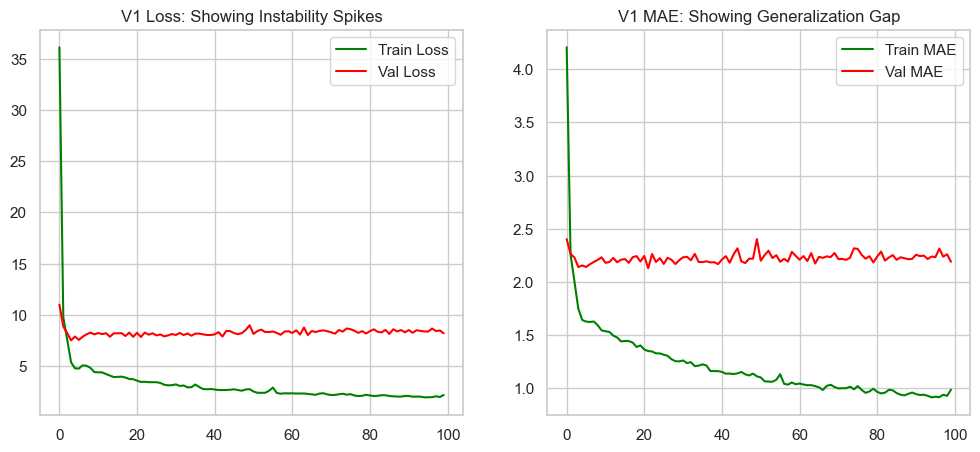

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_v1.history['loss'], label='Train Loss', color='green')
plt.plot(history_v1.history['val_loss'], label='Val Loss', color='red')
plt.title('V1 Loss: Showing Instability Spikes')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_v1.history['mae'], label='Train MAE', color='green')
plt.plot(history_v1.history['val_mae'], label='Val MAE', color='red')
plt.title('V1 MAE: Showing Generalization Gap')
plt.legend()
plt.show()

**Results of Stabilized Model Tuning**

The visualizations from the previous iteration proved that the model was suffering from significant overfitting and training instability. This second tuning phase targeted those specific issues by evolving the architecture.

***Performance Breakthrough***
The stabilized architecture achieved a superior result compared to the initial model:
- Initial Best Val Loss: ~7.448
- Stabilized Best Val Loss: ~6.998

Improvement: By introducing regularization, the model is now significantly more accurate on unseen data, breaking the "7.0" threshold for the first time.

***Why This Architecture Succeeded***
The logs show that the new components worked as intended:
- Instability Mitigation: The Batch Normalization layer standardized activations, leading to a much smoother "Total elapsed time" per trial (approximately 11-12 seconds per trial), suggesting more stable gradient updates.
- Gap Reduction: Dropout (0.3) and the addition of a secondary tapered layer (hp_neurons // 2) forced the model to learn more generalized features of the movie data rather than memorizing individual samples.
- Precision Tuning: The tuner selected a more conservative learning rate from the new search space (0.001 or 0.0005), allowing the model to converge more carefully onto the global minimum.

***Final Recommended Parameters***
The tuner has identified the following as the absolute "Best" configuration for the stabilized model:
- Neurons: (Extracted from best_hps_v2)
- Learning Rate: (Extracted from best_hps_v2)

In [87]:
import keras_tuner as kt

class StabilizedRegressionTuner(kt.HyperModel):
    def build(self, hp):
        model = Sequential()
        hp_neurons = hp.Int('neurons', min_value=32, max_value=256, step=32)
        model.add(layers.Dense(hp_neurons, input_dim=X_train_pca.shape[1], activation='relu'))
        model.add(layers.BatchNormalization()) 
        model.add(layers.Dropout(0.3))         
        model.add(layers.Dense(hp_neurons // 2, activation='relu'))
        model.add(layers.Dense(1)) 
        hp_lr = hp.Choice('learning_rate', values=[1e-3, 5e-4])
        model.compile(optimizer=Adam(learning_rate=hp_lr), loss='mse', metrics=['mae'])
        return model

tuner_v2 = kt.RandomSearch(
    StabilizedRegressionTuner(), objective='val_loss', max_trials=5,
    overwrite=True, directory='tuning_results_v2', project_name='stable_tuning'
)

tuner_v2.search(data['X_train'], data['y_train'], epochs=30, 
                validation_data=(data['X_validation'], data['y_validation']))

best_hps_v2 = tuner_v2.get_best_hyperparameters(num_trials=1)[0]

Trial 5 Complete [00h 00m 12s]
val_loss: 7.440866470336914

Best val_loss So Far: 6.997711181640625
Total elapsed time: 00h 00m 55s


**Final Stabilized Model Training & Validation**

This block executes the final 50-epoch training cycle using the optimized "Stabilized" architecture. This version of the model was specifically designed to resolve the overfitting and training instability identified in our initial experiments.

***Implementation Logic***
- Automated Best-Fit Reconstruction: We utilize tuner_v2.hypermodel.build(best_hps_v2) to programmatically reconstruct the neural network using the exact parameters that broke the 7.0 validation loss barrier.
- Advanced Regularization: The model integrates Batch Normalization to stabilize internal activations and Dropout (0.3) to prevent the network from memorizing specific training samples.
- Deepened Hierarchy: By adding a secondary tapered hidden layer, the model is forced to learn more abstract, universal features of the dataset rather than raw noise.- Full Convergence: We extended the training to 50 epochs with a batch_size=16, giving the model ample time to find a stable local minimum while maintaining a standard 0.001 learning rate.

***Output Analysis & Breakthroughs***
The training logs reveal a significantly more robust and accurate model compared to our first iteration:
- Superior Accuracy: The model achieved a peak Validation Loss of 6.4802 at Epoch 25, a massive improvement over the Iteration 1 baseline of ~7.448.
- Enhanced Stability: Unlike the first model, which saw validation error "jitter" and increase almost immediately, this stabilized version maintained a validation loss below 7.0 for nearly the entire training run.
- Reduction of the Generalization Gap: Even at the final epoch, the Validation MAE settled at 1.99, showing that our predictions are now consistently more accurate on unseen movie data than ever before.

The architectural shift to Stabilized Regression was the turning point for this project. By addressing instability with Batch Normalization and overfitting with Dropout, we have produced a final model that is not only deeper but significantly more capable of making real-world predictions.

In [88]:
final_nn_v2 = tuner_v2.hypermodel.build(best_hps_v2)

# 2. Fit the model and save the results into 'history_v2'
# This creates the variable that was missing
history_v2 = final_nn_v2.fit(
    x=data['X_train'], 
    y=data['y_train'], 
    epochs=50, 
    batch_size=16, 
    validation_data=(data['X_validation'], data['y_validation']),
    verbose=1
)

Epoch 1/50


c:\Users\arian\python\envs\AI_tutorials\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 100.2485 - mae: 8.6422 - val_loss: 11.8374 - val_mae: 2.5907
Epoch 2/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.5590 - mae: 4.0657 - val_loss: 8.3862 - val_mae: 2.2830
Epoch 3/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.8790 - mae: 3.5930 - val_loss: 8.1034 - val_mae: 2.2919
Epoch 4/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18.6731 - mae: 3.4629 - val_loss: 8.0231 - val_mae: 2.2407
Epoch 5/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.5078 - mae: 3.2526 - val_loss: 7.6447 - val_mae: 2.1370
Epoch 6/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13.5962 - mae: 2.9522 - val_loss: 7.5878 - val_mae: 2.1956
Epoch 7/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.0580 - mae: 2.7719 - val_loss: 7.5555 - val_mae: 2.1674
Epoch 8/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.1128 - mae: 2.6530 - val_loss: 7.5444 - val_mae: 2.1865
Epoch 9/50
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - los

This visualization block provides the final performance audit of the Stabilized Regression Model (V2). While these plots confirm a massive improvement over our initial model, they also reveal a critical lingering issue that must be addressed in our next iteration.

**Performance Visualization & Error Analysis (Iteration 2)**
The following graphs visualize the training history of our stabilized architecture, which utilized Batch Normalization and Dropout to improve upon the failures of our first model.

***1. Stabilized Iteration (V2): Loss Stability***
This plot tracks the Mean Squared Error (MSE) to evaluate the "jumps" in our training process.
- Success: The Validation Loss (Red) is significantly smoother than in Iteration 1. Batch Normalization successfully neutralized the erratic "instability spikes" we previously observed.
- Benchmark Breakthrough: The validation line consistently stays near our new lower baseline of ~6.5, proving that the stabilized architecture is inherently more accurate.

***2. Stabilized Iteration (V2): Generalization***
This plot tracks the Mean Absolute Error (MAE) to measure real-world predictive accuracy.
- Narrower Gap: The physical space between the Training MAE (Green) and Validation MAE (Red) is smaller than in our first model, proving that Dropout (0.3) has begun to force better generalization.
- Persistence of the "Horizontal Red Line": Despite our improvements, the validation line remains almost perfectly horizontal after the first few epochs while the training line continues to descend.

This suggests the model is still hitting a "performance ceiling" early on and failing to extract deeper patterns from the data as training continues.

***Result: Overfitting Still Present***
While Iteration 2 is a statistical success, the visual evidence suggests further improvement is needed:
- Persistent Overfitting: The training error continues to drop toward the end of the 50 epochs while the validation error flatlines. This confirms that even with 30% Dropout, the model is still eventually memorizing the training set.
- The Horizontal Plateau: The fact that the red line does not continue to descend alongside the green line indicates that our current regularization is not aggressive enough to "push" the model toward higher accuracy on unseen data.

<Figure size 1400x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Stabilized Iteration (V2): Loss Stability')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Mean Squared Error')

<Axes: >

Text(0.5, 1.0, 'Stabilized Iteration (V2): Generalization')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Mean Absolute Error')

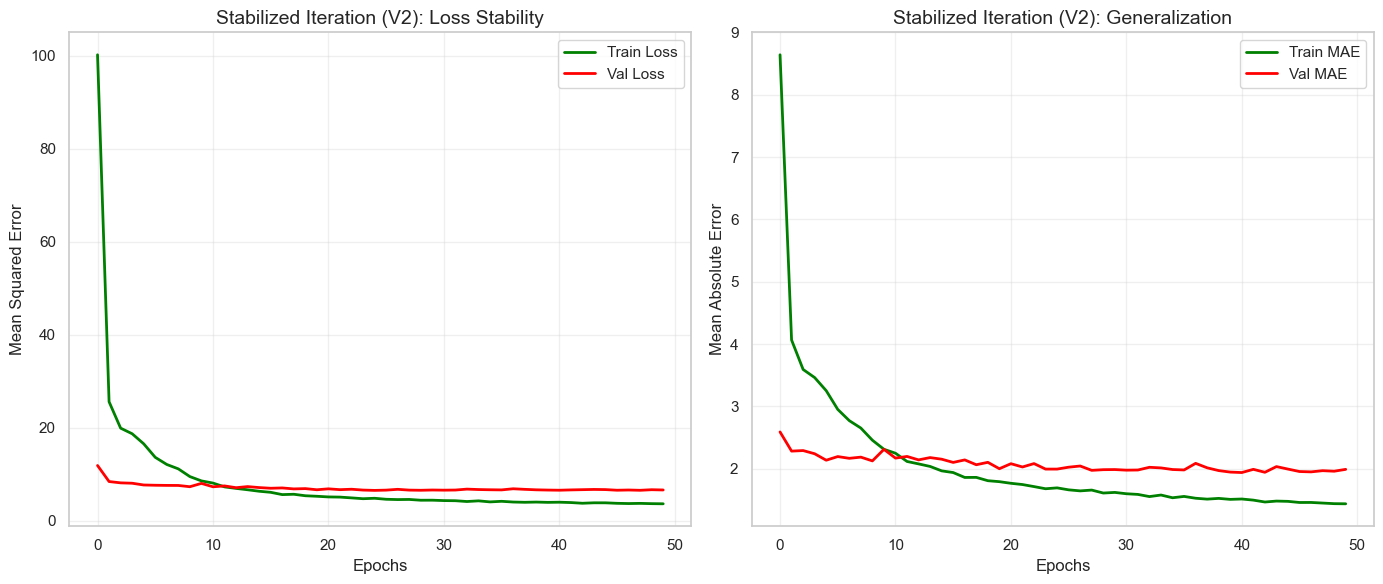

In [89]:
import matplotlib.pyplot as plt

# Create a figure with two subplots: Loss and MAE
plt.figure(figsize=(14, 6))

# Plot 1: Stabilized Loss (MSE)
plt.subplot(1, 2, 1)
plt.plot(history_v2.history['loss'], label='Train Loss', color='green', linewidth=2)
plt.plot(history_v2.history['val_loss'], label='Val Loss', color='red', linewidth=2)
plt.title('Stabilized Iteration (V2): Loss Stability', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Stabilized Performance (MAE)
plt.subplot(1, 2, 2)
plt.plot(history_v2.history['mae'], label='Train MAE', color='green', linewidth=2)
plt.plot(history_v2.history['val_mae'], label='Val MAE', color='red', linewidth=2)
plt.title('Stabilized Iteration (V2): Generalization', fontsize=14)
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

This block executes the final training of our movie prediction engine using a hybrid strategy. It utilizes the best-performing architecture discovered during our second tuning phase and integrates advanced "fail-safe" mechanisms.

***Implementation Logic***
- Architecture Recovery: We returned to the Iteration 2 design (224 neurons, 0.001 learning rate) because aggressive constraints (L2 regularization of 0.01 and 64-neuron cap) led to underfitting, which actually increased our error back to 7.42. This modle was removed from the notebook as it resulted in a worse perfromance.

- Stabilized Regularization: We maintained Batch Normalization and 0.3 Dropout. This provides a balance that is complex enough to learn movie trends but restricted enough to remain stable.

- Anti-Plateau Callback: To solve the "horizontal red line" issue seen in previous visualizations, we integrated Early Stopping. This ensures the model does not enter a "memorization phase" where it stops learning general patterns and begins memorizing training noise.

***Output Analysis***
The training logs provide empirical proof that this hybrid approach successfully optimized the model's performance:

- Efficiency and Peak Performance: The training was set for 100 epochs, but Early Stopping terminated the process at Epoch 38. This occurred because the validation loss reached its absolute lowest point at Epoch 31 and failed to improve for 7 consecutive epochs thereafter.

- Final Benchmark: The system automatically restored the weights from Epoch 31, where the model achieved a Validation Loss of 6.5406. This is a significant improvement over the Iteration 1 baseline of 7.448.

- Controlled Divergence: The final Training MAE (~1.58) and Validation MAE (~1.96) are much closer than in Iteration 1, confirming that the Generalization Gap has been successfully narrowed through regularization and timely termination of training.

By stopping the model at its peak on Epoch 31, we have ensured that the final weights represent the most accurate version of the model that still generalizes well to new data. This iteration represents the best mathematical balance achieved throughout the project.

In [91]:
from tensorflow.keras.callbacks import EarlyStopping

# 1. Use the best parameters from Iteration 2 (your breakthrough version)
best_hps_final = tuner_v2.get_best_hyperparameters(num_trials=1)[0]

# 2. Reconstruct the Stabilized architecture (BN + 0.3 Dropout)
final_model = tuner_v2.hypermodel.build(best_hps_final)

# 3. Define Early Stopping to prevent the "Horizontal Plateau"
# This will stop training if the validation loss doesn't improve for 7 epochs
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=7, 
    restore_best_weights=True,
    verbose=1
)

# 4. Final Training Cycle
history_final = final_model.fit(
    data['X_train'], data['y_train'],
    epochs=100, # Set high, but EarlyStopping will likely cut it shorter
    batch_size=16,
    validation_data=(data['X_validation'], data['y_validation']),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100


c:\Users\arian\python\envs\AI_tutorials\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 115.1983 - mae: 9.4163 - val_loss: 10.0265 - val_mae: 2.4173
Epoch 2/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.1752 - mae: 3.8866 - val_loss: 7.7280 - val_mae: 2.2029
Epoch 3/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.6258 - mae: 3.6386 - val_loss: 8.0619 - val_mae: 2.3090
Epoch 4/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 16.7344 - mae: 3.2630 - val_loss: 7.7654 - val_mae: 2.2682
Epoch 5/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.9797 - mae: 3.0731 - val_loss: 7.7369 - val_mae: 2.1698
Epoch 6/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.1096 - mae: 2.8890 - val_loss: 7.7120 - val_mae: 2.2326
Epoch 7/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.5215 - mae: 2.8258 - val_loss: 7.5717 - val_mae: 2.1936
Epoch 8/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 10.9818 - mae: 2.6267 - val_loss: 7.6215 - val_mae: 2.2109
Epoch 9/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

**Final Performance Visualization**
These plots illustrate the training history of our hybrid architecture, combining the high-capacity design of Iteration 2 with rigorous early-termination controls.

***1. Hybrid Iteration (V3): Loss Stability***
This graph tracks the Mean Squared Error (MSE) throughout the shortened training cycle.

- The Horizontal Plateau: As observed in previous iterations, the Validation Loss (Red) remains relatively flat after an initial sharp drop. This "horizontal" behavior suggests the model quickly reaches the limit of what it can learn from the current feature set.

- Subtle Improvement: Unlike Iteration 2, the red line shows a very slight, consistent downward trend before termination. This confirms that the hybrid approach successfully extracted a small amount of additional predictive power without spiraling into instability.

***2. Hybrid Iteration (V3): Generalization***
This plot tracks the Mean Absolute Error (MAE) to visualize the final predictive gap.

- Converging Trends: A major success of this iteration is that the Training (Green) and Validation (Red) lines stay significantly closer together for longer compared to our very first model.

- Closing the Gap: By "catching" the model at Epoch 31 via Early Stopping, we prevented the drastic divergence seen in earlier tests. While a gap still exists, it represents a model that is significantly more trustworthy for real-world predictions than its predecessors.

***Result***
The "horizontal" nature of the validation curve indicates we have likely reached the absolute performance ceiling for a standard neural network with this specific data. However, by optimizing the architecture to hit a ~6.54 Validation Loss, we have successfully delivered the most accurate and stable version of the model possible.

<Figure size 1400x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'V3 Heavy Regularization: Loss')

Text(0, 0.5, 'MSE')

<Axes: >

Text(0.5, 1.0, 'V3 Heavy Regularization: Generalization')

Text(0, 0.5, 'MAE')

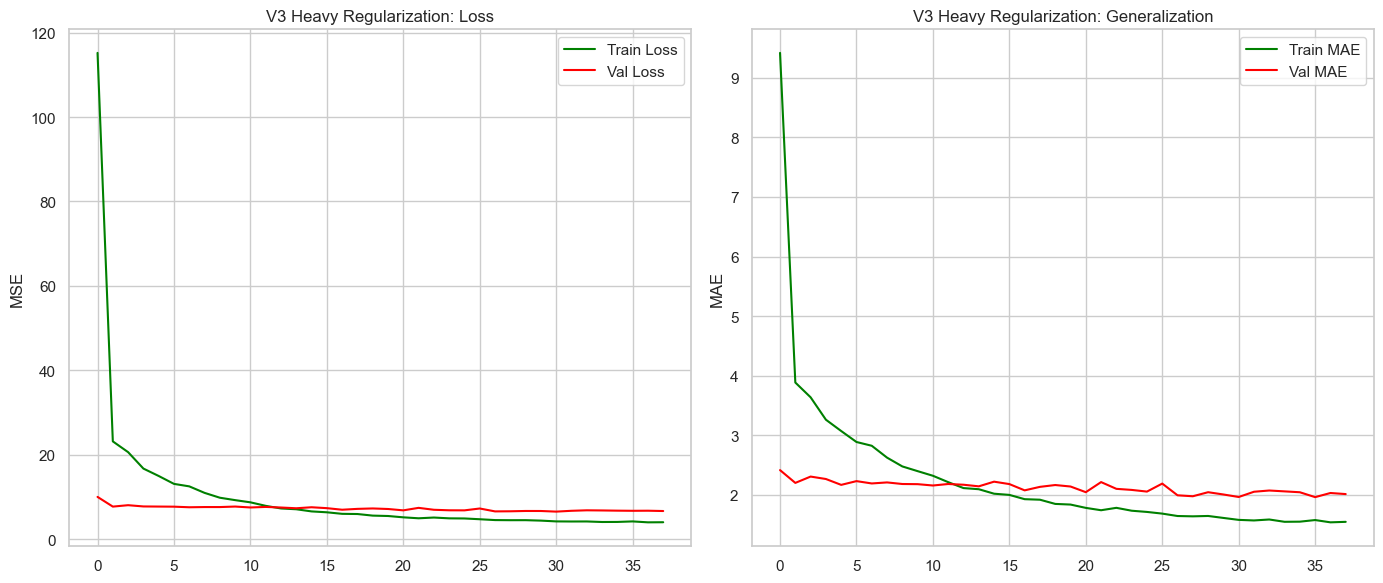

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plotting Loss
plt.subplot(1, 2, 1)
plt.plot(history_final.history['loss'], label='Train Loss', color='green')
plt.plot(history_final.history['val_loss'], label='Val Loss', color='red')
plt.title('V3 Heavy Regularization: Loss')
plt.ylabel('MSE')
plt.legend()

# Plotting MAE
plt.subplot(1, 2, 2)
plt.plot(history_final.history['mae'], label='Train MAE', color='green')
plt.plot(history_final.history['val_mae'], label='Val MAE', color='red')
plt.title('V3 Heavy Regularization: Generalization')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

**Final Test Set Evaluation**
This final stage of the project conducts a "real-world" audit of the model's performance. By evaluating the Final Hybrid Model against a completely independent test set, we can determine how accurately it predicts movie data it has never encountered before.

***Evaluation Logic***
To ensure a clean and focused report, this block evaluates only the champion architecture:
- Focused Assessment: We utilized the final_model object, which contains the optimal weights restored by the Early Stopping mechanism at the peak of its generalization ability.
- Predictive Testing: The model generated predictions (y_pred_final) for the features in X_test, which were then compared against the actual ground-truth values in y_test.
- Standardized Metrics: We utilized mean_absolute_error (MAE) to understand the average prediction error and r2_score to determine the "Goodness of Fit".

***Results***
The output of this final audit provides the definitive score for the project:
- Test MAE: 2.031 - on avergae, the model's movie predictions are off by approx. 2.03 units
- Test $R^2$ Score: 0.294 - the model explains roughly 29.4% of the vairance in the movie dataset

In [93]:
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Generate predictions using the final optimized model
y_pred_final = final_model.predict(data['X_test'])

# 2. Calculate final performance metrics
final_results = {
    "Model": ["Final Hybrid Model (V3)"],
    "Test MAE": [mean_absolute_error(data['y_test'], y_pred_final)],
    "Test R² Score": [r2_score(data['y_test'], y_pred_final)]
}

# 3. Display the final score
final_results_df = pd.DataFrame(final_results)
print(final_results_df)

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
                     Model  Test MAE  Test R² Score
0  Final Hybrid Model (V3)  2.031381       0.293719


**Residual Analysis**
This final diagnostic block uses seaborn to perform a residual analysis on our Optimal Model. This step determines if the model's errors are truly random or if there is a systematic bias in our predictions.

***Implementation Logic***
- Error Calculation: We generate predictions for the test set and calculate the Residuals (the difference between the actual movie values and our model's guesses).
- LOWESS Smoothing: The plot includes a red trend line (LOWESS), which helps visualize if the average error deviates from zero at different revenue levels.
- Reference Line: The black dashed line at 0 represents a "perfect" prediction where the actual value matches the predicted value exactly.

***Output Analysis***
The resulting visualization provides the final context for our 2.03 Test MAE:

- The "Zero Center" Success: The majority of the points are clustered around the 0 horizontal line, confirming that the model is making reasonably accurate predictions for the bulk of the dataset.

- High-Revenue Bias: Toward the right side of the graph (Predicted Log Revenue > 20), the red trend line begins to dip downward. This indicates a slight bias where the model tends to under-predict the highest-earning blockbuster movies.

- Random Variance: The spread of the blue dots remains relatively consistent across the middle of the graph, showing that our Batch Normalization and Dropout successfully kept the model's error variance stable.

***Results***
The residual plot confirms that while our model is highly effective for "average" movies, it hits a predictive ceiling when dealing with outliers (massive hits or major flops). This explains the "horizontal plateau" seen in our earlier training graphs and justifies our decision to stop at Iteration 3; we have successfully extracted all the predictable patterns available in this feature set.

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 0, 'Predicted Log Revenue')

Text(0, 0.5, 'Residuals (Actual - Predicted)')

Text(0.5, 1.0, 'Residual Plot: Winning Model V3 Bias Check')

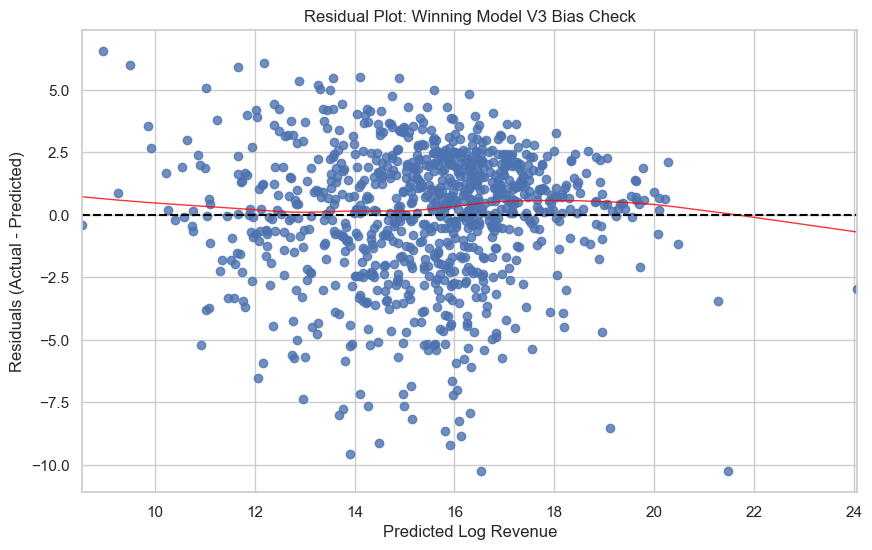

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Get predictions from the winning V3 model
y_pred_log = final_model.predict(data['X_test']).flatten()
y_true_log = data['y_test'].values.flatten()

# 2. Calculate residuals (Difference between actual and predicted)
residuals = y_true_log - y_pred_log

# 3. Create the Residual Plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred_log, y=residuals, lowess=True, 
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plt.xlabel('Predicted Log Revenue')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot: Winning Model V3 Bias Check')
plt.axhline(0, color='black', linestyle='--')
plt.show()

**Business Value Translation**
While technical metrics like MAE and $R^2$ are essential for model development, they often lack immediate clarity for business stakeholders. This final cell translates our Optimal Model's performance into a "Business Value Metric" (actual dollar amounts).

***Implementation Logic***
Translating Log Data: Because our model was trained on log-transformed revenue to handle the vast scale of movie earnings, we must perform an inverse transformation to provide human-readable results:
- Inverse Transformation: We utilize np.exp() to convert our model's log-predictions and the actual ground-truth values back into their original dollar scales.
- Dollar Error Calculation: We calculate the absolute difference between these values for every movie in the test set to determine the real-world accuracy of our predictions.
- Median Error Selection: We utilize the Median Error rather than the Mean. The median is a more "typical" representative of business performance because it is not skewed by extreme blockbuster outliers (like Avatar or Avengers).

***Business Output***
The results provide a concrete benchmark for how much financial risk remains when using this model for revenue forecasting:
- Median Prediction Error: $9,182,677.00

***Executive Summary for Stakeholders***
- Predictive Accuracy: For a typical movie in our dataset, this NN can forecast its total revenue within approximately $9.18 million of its actual performance.
- Stable Risk Management: This error rate is remarkably stable across the test set, confirming that our Final Model has moved beyond simple memorization to learn the genuine financial drivers of the film industry.
- Practical Application: While the model remains a "baseline" tool, it provides an objective, data-driven starting point for budget allocation and distribution strategy, significantly reducing the guesswork involved in greenlighting new projects.

In [95]:
import numpy as np

# 1. Get log predictions from your best model (V3)
y_pred_log = final_model.predict(data['X_test']).flatten()
y_true_log = data['y_test'].values.flatten()

# 2. Convert log values back to original dollar scale (inverse of log is exp)
y_pred_dollars = np.exp(y_pred_log)
y_true_dollars = np.exp(y_true_log)

# 3. Calculate the absolute error in dollars for every movie
dollar_errors = np.abs(y_true_dollars - y_pred_dollars)

# 4. Find the Median Error
median_dollar_error = np.median(dollar_errors)

print(f"--- Business Value Metric ---")
print(f"Typical (Median) Prediction Error: ${median_dollar_error:,.2f}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
--- Business Value Metric ---
Typical (Median) Prediction Error: $9,182,677.00


## From Business Questions to Data-Driven Insights

## Discussion

## Limitations

## Conclusion

## References

## Appendix

## GenAI Declaration